# 2017 장애인 실태조사 뇌병변장애 의료서비스 및 만성질환 탐색(+ 지체장애 만성질환 파레토 차트)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 추출

In [2]:
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

6549

In [3]:
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


---
### 뇌졸중(2), 뇌손상(3) 건수 및 비율 파악

#### **전체 중 뇌병변 장애 비율**

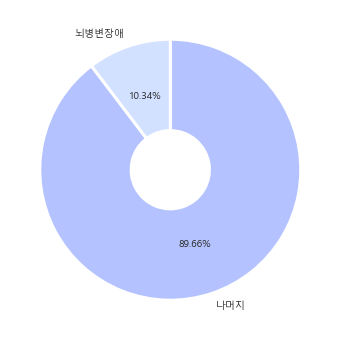

In [4]:
len(raw_df) # 전체 응답자 수: 6,549
raw_df['주된 진단명(1)'].value_counts().sum() # 뇌병변장애 응답자 수: 677

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

x = [len(raw_df)-raw_df['주된 진단명(1)'].value_counts().sum(), raw_df['주된 진단명(1)'].value_counts().sum()]
labels = ['나머지', '뇌병변장애']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(x, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [5]:
pd.DataFrame(raw_df[['주된 진단명(1)']].value_counts()).reset_index()

,주된 진단명(1),0
0,2.0,476
1,3.0,78
2,7.0,46
3,1.0,42
4,4.0,14
5,6.0,13
6,5.0,8


In [6]:
# 건수 파악
print('뇌졸중(뇌경색, 뇌출혈) 응답자 수: ', len(raw_df.loc[raw_df['주된 진단명(1)']==2]), "명")
print('뇌손상 응답자 수: ', len(raw_df.loc[raw_df['주된 진단명(1)']==3]), "명")
print('나머지: ', 677 -len(raw_df.loc[raw_df['주된 진단명(1)']==2]) - len(raw_df.loc[raw_df['주된 진단명(1)']==3]), "명")

뇌졸중(뇌경색, 뇌출혈) 응답자 수:  476 명
뇌손상 응답자 수:  78 명
나머지:  123 명


#### **세부 비율**

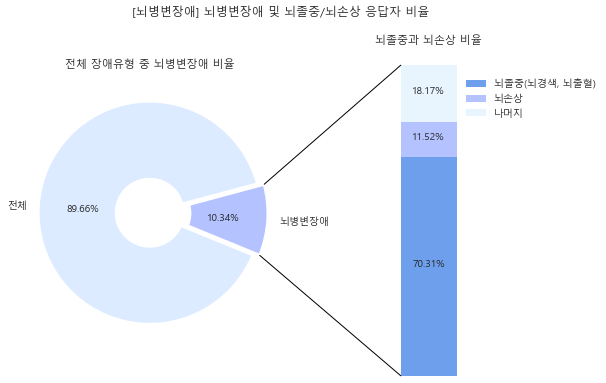

In [282]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [89.66, 10.34]
labels = ['전체', '뇌병변장애']
colors = ['#dcebff', '#b4c3ff']
explode = [0, 0.06]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.set_title('전체 장애유형 중 뇌병변장애 비율', size = 11)
ax1.pie(ratios, autopct='%0.2f%%', startangle=375, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [0.7031, 0.1152, 0.1817]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('뇌졸중과 뇌손상 비율', size = 11)
ax2.legend(('뇌졸중(뇌경색, 뇌출혈)', '뇌손상', '나머지'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[1].theta1, ax1.patches[1].theta2
center, r = ax1.patches[1].center, ax1.patches[1].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌병변장애 및 뇌졸중/뇌손상 응답자 비율', fontsize=12, y = .98)
# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌병변장애 및 뇌졸중, 뇌손상 응답자 비율.png', dpi=300)
plt.show()

---
### 의료진의 장애 이해정도 및 의료서비스 만족도

범주형 변수 간 연관성을 파악하기 위해 독립성 검정 시행

In [8]:
len(df) # df: (뇌졸중 + 뇌손상)만 추출한 데이터

554

In [9]:
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


In [10]:
understand_df = df[['의료진 장애 이해정도', '의료서비스 만족도']].groupby(['의료진 장애 이해정도', '의료서비스 만족도'])[['의료진 장애 이해정도']].count().add_suffix('_Count').reset_index()
understand_df

,의료진 장애 이해정도,의료서비스 만족도,의료진 장애 이해정도_Count
0,1,1,54
1,1,2,34
2,1,3,3
3,1,4,2
4,2,1,5
5,2,2,284
6,2,3,35
7,2,4,4
8,3,1,2
9,3,2,19


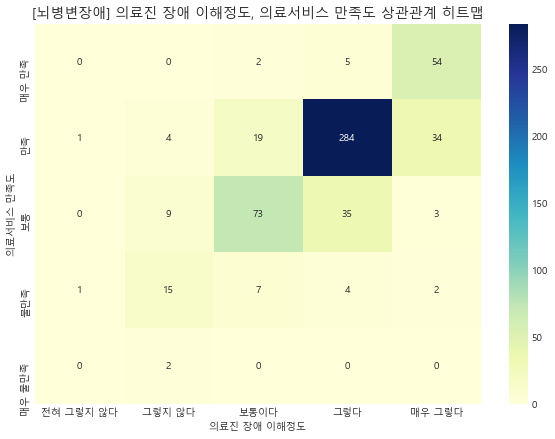

In [11]:
# heatmap 생성
understand_pivot_df = understand_df.pivot('의료서비스 만족도', '의료진 장애 이해정도', '의료진 장애 이해정도_Count').fillna(0)
x_axis_labels = ['매우 그렇다', '그렇다', '보통이다', '그렇지 않다', '전혀 그렇지 않다'] # labels for x-axis
y_axis_labels = ['매우 만족', '만족', '보통', '불만족', '매우 불만족'] # labels for y-axis

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.heatmap(understand_pivot_df, annot=True, cmap='YlGnBu', 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g') # fmt='g': e-notation을 일반표기법으로

plt.title('[뇌병변장애] 의료진 장애 이해정도, 의료서비스 만족도 상관관계 히트맵', fontsize=14)
ax.set_xlabel('의료진 장애 이해정도')
ax.set_ylabel('의료서비스 만족도')
ax.invert_xaxis() # x축 순서 거꾸로

# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 의료진 장애 이해정도, 의료서비스 만족도 상관관계 히트맵.png", dpi=300)
plt.show()

In [12]:
# 참고: 피벗데이터
understand_pivot_df

의료진 장애 이해정도,1,2,3,4,5
의료서비스 만족도,,,,,
1,54.0,5.0,2.0,0.0,0.0
2,34.0,284.0,19.0,4.0,1.0
3,3.0,35.0,73.0,9.0,0.0
4,2.0,4.0,7.0,15.0,1.0
5,0.0,0.0,0.0,2.0,0.0


In [14]:
# 카이제곱 독립성 검정
import scipy.stats as stats
ctab = pd.crosstab(df['의료진 장애 이해정도'], df['의료서비스 만족도'])
# print(ctab)

chi, p, df, ex = stats.chi2_contingency(ctab) 
msg = "chi2 : {:.4f}, p-value : {:.4f}, df : {}".format(chi, p, df) 
print(msg)

chi2 : 632.2705, p-value : 0.0000, df : 16


---
---
### 만성질환 유무

- 1: 예  
- 2: 아니오

In [95]:
# 만성질환 관련 변수 모두 추출
disease_df = df.iloc[:, 209:247]
disease_df

,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),...,혈당관리 치료 여부,혈당치료 - 인슐린주사,혈당치료 - 당뇨병약,혈당치료 - 비약물요법,혈당치료 - 기타,관절통증 정도,우울증 치료 여부,암 종류1,암 종류2,암 종류3
13,1,1,1,1,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,0
15,1,2,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
42,1,1,1,2,2,2,1,2,2,1,...,1,2,1,2,2,0,0,0,0,0
85,1,1,1,2,1,1,2,2,2,2,...,0,0,0,0,0,5,0,8,0,0
118,1,1,1,2,2,2,1,2,2,2,...,1,2,1,2,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6513,1,1,1,2,2,1,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
6525,1,2,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
6536,1,1,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
6537,1,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [96]:
disease_df[['만성질환 유무']].value_counts()

만성질환 유무
1          528
2           26
dtype: int64

In [97]:
# 만성질환이 있는 정보만 추출
disease_df1 = disease_df.loc[disease_df['만성질환 유무'] != 2].iloc[:, 1:26] # 2는 '아니오'를 의미하므로 제거
disease_df1

# 2 -> 0 으로 변경
col_list = disease_df1.columns.tolist()
for i in range(len(col_list)):
    disease_df1.replace({col_list[i]: 2}, {col_list[i]: 0}, inplace=True)
disease_df1

# 개인당 보유하고 있는 만성질환 수, 'counts' 변수 생성
disease_df1['counts'] = np.sum(disease_df1, axis = 1) 

disease_df1.head()

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타),counts
13,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5
15,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,5
42,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
85,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,9
118,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


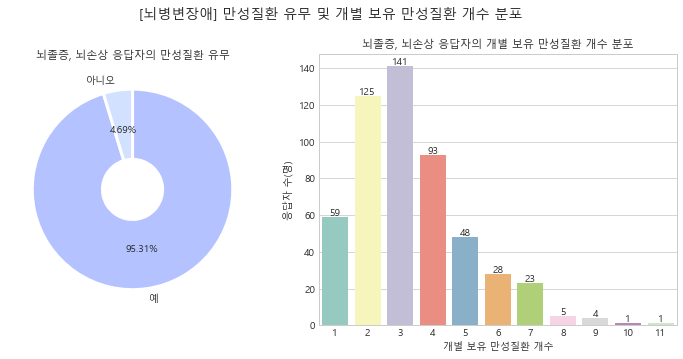

In [293]:
# 만성질환 유무 비유 파악
fig, (ax1, ax2) = plt.subplots(1, 2,
                               gridspec_kw={'width_ratios': [1.4, 2]}) # 서브플롯 비율 설정
fig.set_size_inches(12, 5)

## ax1(pie chart)
ratios = [528, 26]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax1.set_title('뇌졸증, 뇌손상 응답자의 만성질환 유무', size = 11)

## ax2(barplot)
dis_count_df = pd.DataFrame(disease_df1[['counts']].value_counts()).reset_index().sort_values(by=0, ascending = False)
splot = sns.barplot(data = dis_count_df, x = 'counts', y=0, ax = ax2, palette='Set3')
ax2.set_title('뇌졸증, 뇌손상 응답자의 개별 보유 만성질환 개수 분포', size = 11)
ax2.set_xlabel('개별 보유 만성질환 개수')
ax2.set_ylabel('응답자 수(명)')

for bar in splot.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

fig.suptitle('[뇌병변장애] 만성질환 유무 및 개별 보유 만성질환 개수 분포', fontsize=14, y = 1.01)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 만성질환 유무 및 보유 만성질환 개수 분포.png", dpi=300)
plt.show()

---
### ~~앓고 있는 만성질환 비율~~

* 중복 응답 모두 포함

In [127]:
# # 필요 없는 문자열 제거
# data = pd.DataFrame(disease_df1.iloc[:, :-1].sum(axis = 0)).reset_index()
# col_lst2 = data['index'].tolist()

# disease_name = []
# for i in range(len(col_lst2)):
#     disease_name.append(col_lst2[i][9 : -1]) # 필요없는 문자열 제거( '숫자)만성질환명(' , ')' )

# data['disease_name'] = disease_name

# # 변수명 변경
# data.rename(columns={'index':'raw_name', 0:'n'}, inplace=True)
# data.sort_values(by = 'n', ascending=False, inplace=True)
# data.head()

,raw_name,n,disease_name
1,"02)만성질환명(뇌졸증,중풍)",457,"뇌졸증,중풍"
0,01)만성질환명(고혈압),394,고혈압
5,06)만성질환명(당뇨병),164,당뇨병
24,25)만성질환명(기타),134,기타
19,20)만성질환명(허리목통증),125,허리목통증


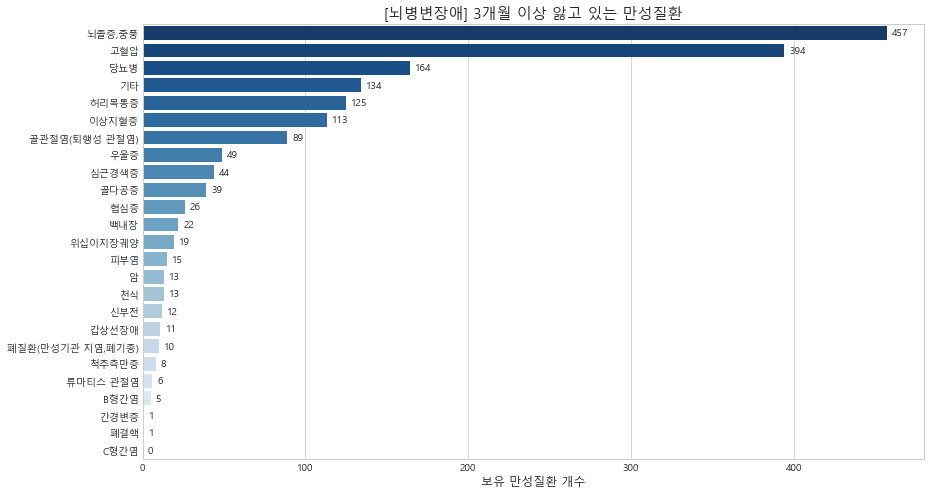

In [137]:
# disease_col = data['disease_name'].tolist()

# fig, ax = plt.subplots()
# fig.set_size_inches(14, 8)

# palette = sns.color_palette("Blues", n_colors=25) 
# palette.reverse() # 색상 진한 정도 거꾸로

# splot = sns.barplot(data=data, y = 'disease_name', x = 'n', palette=palette)

# ax.set_title('[뇌병변장애] 3개월 이상 앓고 있는 만성질환', size = 15)
# ax.set_xlabel('보유 만성질환 개수', size = 12)
# ax.set_ylabel('')

# for p in splot.patches:
#     ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#             xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 3개월 이상 앓고 있는 만성질환.png", dpi=300)
# plt.show()

---
### ~~뇌졸중(뇌경색, 뇌출혈) 응답자의 앓고 있는 만성질환 비율~~

In [135]:
# # 뇌졸중(뇌경색, 뇌출혈)
# stroke_df = pd.concat([df['주된 진단명(1)'], disease_df1], axis=1).loc[df['주된 진단명(1)']==2]

# stroke_data = pd.DataFrame(stroke_df.iloc[:, 1:-1].sum(axis = 0)).reset_index()
# col_lst3 = stroke_data['index'].tolist()

# disease_name = []
# for i in range(len(col_lst3)):
#     disease_name.append(col_lst3[i][9 : -1]) # 필요없는 문자열 제거( '숫자)만성질환명(' , ')' )

# stroke_data['disease_name'] = disease_name

# stroke_data.rename(columns={'index':'raw_name', 0:'n'}, inplace=True)
# stroke_data.sort_values(by = 'n', ascending=False, inplace=True)
# stroke_data = stroke_data.astype({'n':'int64'})
# stroke_data

,raw_name,n,disease_name
1,"02)만성질환명(뇌졸증,중풍)",449,"뇌졸증,중풍"
0,01)만성질환명(고혈압),375,고혈압
5,06)만성질환명(당뇨병),158,당뇨병
19,20)만성질환명(허리목통증),114,허리목통증
4,05)만성질환명(이상지혈증),109,이상지혈증
24,25)만성질환명(기타),103,기타
15,16)만성질환명(골관절염(퇴행성 관절염)),78,골관절염(퇴행성 관절염)
22,23)만성질환명(우울증),42,우울증
2,03)만성질환명(심근경색증),40,심근경색증
17,18)만성질환명(골다공증),36,골다공증


In [133]:
# # 뇌손상
# brain_damage_df = pd.concat([df['주된 진단명(1)'], disease_df1], axis=1).loc[df['주된 진단명(1)']==3]

# brain_damage_data = pd.DataFrame(brain_damage_df.iloc[:, 1:-1].sum(axis = 0)).reset_index()
# col_lst4 = brain_damage_data['index'].tolist()

# disease_name = []
# for i in range(len(col_lst4)):
#     disease_name.append(col_lst4[i][9 : -1]) # 필요없는 문자열 제거( '숫자)만성질환명(' , ')' )

# brain_damage_data['disease_name'] = disease_name

# brain_damage_data.rename(columns={'index':'raw_name', 0:'n'}, inplace=True)
# brain_damage_data.sort_values(by = 'n', ascending=False, inplace=True)
# brain_damage_data = brain_damage_data.astype({'n':'int64'})
# brain_damage_data

,raw_name,n,disease_name
24,25)만성질환명(기타),31,기타
0,01)만성질환명(고혈압),19,고혈압
19,20)만성질환명(허리목통증),11,허리목통증
15,16)만성질환명(골관절염(퇴행성 관절염)),11,골관절염(퇴행성 관절염)
1,"02)만성질환명(뇌졸증,중풍)",8,"뇌졸증,중풍"
22,23)만성질환명(우울증),7,우울증
5,06)만성질환명(당뇨병),6,당뇨병
2,03)만성질환명(심근경색증),4,심근경색증
7,08)만성질환명(천식),4,천식
4,05)만성질환명(이상지혈증),4,이상지혈증


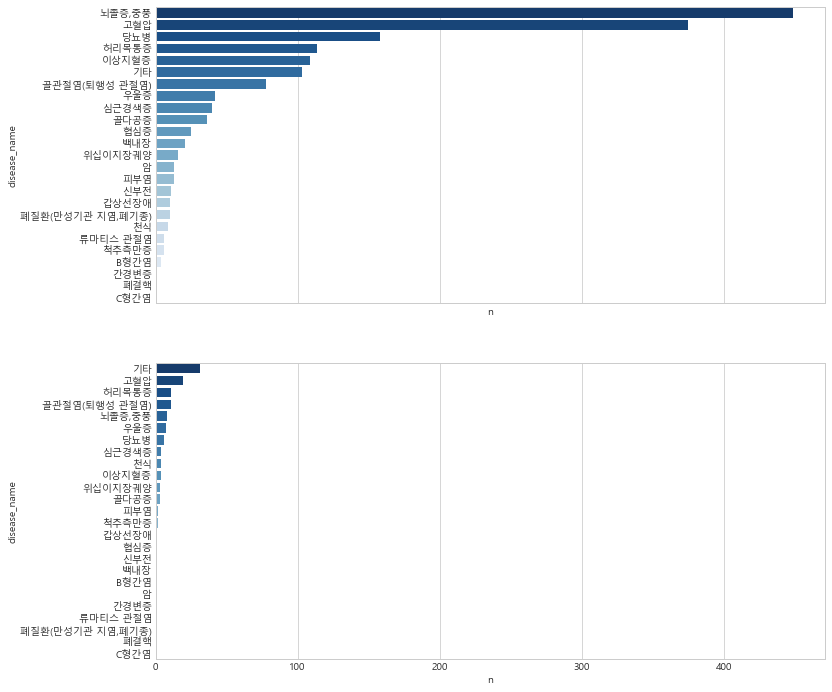

In [143]:
# # 시각화(뇌졸중 + 뇌손상)
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# fig.set_size_inches(12, 12)

# palette = sns.color_palette("Blues", n_colors=25) 
# palette.reverse() # 색상 진한 정도 거꾸로

# splot1 = sns.barplot(data=stroke_data, y = 'disease_name', x = 'n', palette=palette, ax=ax1)
# splot2 = sns.barplot(data=brain_damage_data, y = 'disease_name', x = 'n', palette=palette, ax=ax2)

# ax.set_title('[뇌병변장애] 3개월 이상 앓고 있는 만성질환', size = 15)
# ax.set_xlabel('보유 만성질환 개수', size = 12)
# ax.set_ylabel('')

# for p in splot1.patches:
#     ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#             xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# # plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 3개월 이상 앓고 있는 만성질환.png", dpi=300)
# plt.show()

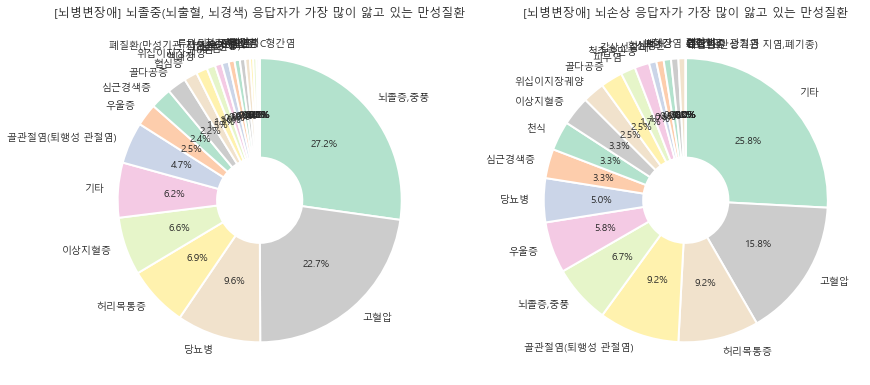

In [190]:
# # 시각화(뇌졸중 + 뇌손상)
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.set_size_inches(14, 8)

# palette = sns.color_palette("Pastel2", n_colors=25) 
# palette.reverse() # 색상 진한 정도 거꾸로

# # ax1
# x1 = stroke_data.n.tolist()
# labels1 = stroke_data['disease_name'].tolist()
# wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
# # explode = [0, 0, 0.1, 0.1]
# ax1.pie(x1, labels = labels1, colors = palette, autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)
# ax1.set_title('[뇌병변장애] 뇌졸중(뇌출혈, 뇌경색) 응답자가 가장 많이 앓고 있는 만성질환', size = 12)

# # ax2
# x2 = brain_damage_data.n.tolist()
# labels2 = brain_damage_data['disease_name'].tolist()
# # explode = [0, 0, 0.1, 0.1]
# ax2.pie(x2, labels = labels2, colors = palette, autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)
# ax2.set_title('[뇌병변장애] 뇌손상 응답자가 가장 많이 앓고 있는 만성질환', size = 12)

# plt.show()

---
### 2개 이상의 질환을 가진 **뇌병변장애 응답자**가 가장 많이 앓고 있는 만성질환

[순서]  
1. *disease_df1*의 *counts* 변수를 이용해 **>=2** 인 행만 추출
1. 각 컬럼명에서 필요한 문자열만 추출(**만성질환명만 추출**되도록 한다.)
1. 1로 저장된 값을 해당 컬럼명(=만성질환명)으로 변경
1. 행별로 3번에서 처리한 각 값들을 특수문자 등으로 연결하여 새로운 컬럼 생성

In [142]:
# "count>=2" 조건 이용
more_df = disease_df1.loc[disease_df1['counts'] >= 2]
more_df.head() # 행 개수: 469

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타),counts
13,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5
15,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,5
42,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
85,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,9
118,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [143]:
# 컬럼명 변경
link_name1 = []

col_lst5 = more_df.columns.tolist()
for i in range(len(col_lst5)):
    link_name1.append(col_lst5[i][9 : -1]) # 필요없는 부분 삭제

more_df.columns = link_name1

more_df.rename(columns={'': 'counts'}, inplace=True)
more_df.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,고혈압,"뇌졸중,중풍",심근경색증,협심증,이상지혈증,당뇨병,갑상선장애,천식,폐결핵,"폐질환(만성기관 지염,폐기종)",...,류마티스 관절염,골다공증,척추측만증,허리목통증,피부염,백내장,우울증,암,기타,counts
13,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5
15,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,5
42,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
85,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,9
118,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [144]:
# 1 값을 해당 컬럼의 컬럼명으로 변환
more_df = more_df.iloc[:, :-1]

for i in range(len(more_df.columns)): # 열 개수
    for j in range(len(more_df.index)): # 행 개수
        if more_df.iloc[j, i] == 0:
            pass
        else:
            more_df.iloc[j, i] = more_df.columns[i]
            
more_df.head()

,고혈압,"뇌졸중,중풍",심근경색증,협심증,이상지혈증,당뇨병,갑상선장애,천식,폐결핵,"폐질환(만성기관 지염,폐기종)",...,골관절염(퇴행성 관절염),류마티스 관절염,골다공증,척추측만증,허리목통증,피부염,백내장,우울증,암,기타
13,고혈압,"뇌졸중,중풍",심근경색증,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,우울증,0,기타
15,0,"뇌졸중,중풍",0,0,0,0,0,0,0,0,...,0,0,골다공증,0,0,0,백내장,0,0,기타
42,고혈압,"뇌졸중,중풍",0,0,0,당뇨병,0,0,폐결핵,0,...,0,0,0,0,0,0,0,0,0,0
85,고혈압,"뇌졸중,중풍",0,협심증,이상지혈증,0,0,0,0,0,...,골관절염(퇴행성 관절염),0,0,0,허리목통증,0,백내장,0,암,기타
118,고혈압,"뇌졸중,중풍",0,0,0,당뇨병,0,0,0,0,...,골관절염(퇴행성 관절염),0,0,0,0,0,0,0,0,0


In [145]:
# 행별로 값을 '/'(구분자)로 연결 -> "Full name" 변수 생성
cols = more_df.columns
more_df['Full Name'] = more_df[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
more_df.head()

# Full name 변수의 불용어 처리(위의 결과에서 '0-'과 '-0' 문자열을 없앤다.)
import re

text_mod=[]
for i in range(len(more_df)):
    text_mod.append(re.sub('0/', "", more_df['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod1 = []
for i in range(len(text_mod)):
    text_mod1.append(re.sub('/0', "", text_mod[i])) # '-0' 제거

In [169]:
text_mod1

['고혈압/뇌졸중,중풍/심근경색증/우울증/기타',
 '뇌졸중,중풍/신부전/골다공증/백내장/기타',
 '고혈압/뇌졸중,중풍/당뇨병/폐결핵',
 '고혈압/뇌졸중,중풍/협심증/이상지혈증/골관절염(퇴행성 관절염)/허리목통증/백내장/암/기타',
 '고혈압/뇌졸중,중풍/당뇨병/골관절염(퇴행성 관절염)',
 '고혈압/뇌졸중,중풍/이상지혈증/당뇨병/골관절염(퇴행성 관절염)/골다공증/백내장',
 '고혈압/뇌졸중,중풍/당뇨병/허리목통증/백내장/우울증',
 '고혈압/뇌졸중,중풍/이상지혈증/골관절염(퇴행성 관절염)/허리목통증/피부염',
 '고혈압/뇌졸중,중풍/심근경색증/협심증/이상지혈증/골관절염(퇴행성 관절염)/골다공증/피부염/백내장',
 '고혈압/뇌졸중,중풍/이상지혈증/천식/골관절염(퇴행성 관절염)/허리목통증/암',
 '고혈압/뇌졸중,중풍',
 '고혈압/뇌졸중,중풍',
 '고혈압/뇌졸중,중풍/기타',
 '고혈압/뇌졸중,중풍/당뇨병',
 '고혈압/뇌졸중,중풍/당뇨병/우울증',
 '뇌졸중,중풍/협심증/당뇨병/골관절염(퇴행성 관절염)',
 '고혈압/천식',
 'B형간염/골관절염(퇴행성 관절염)/척추측만증/우울증',
 '고혈압/뇌졸중,중풍/골다공증/우울증/기타',
 '고혈압/기타',
 '고혈압/뇌졸중,중풍/당뇨병',
 '고혈압/뇌졸중,중풍/당뇨병',
 '고혈압/뇌졸중,중풍/이상지혈증/골관절염(퇴행성 관절염)/허리목통증',
 '뇌졸중,중풍/척추측만증',
 '고혈압/뇌졸중,중풍/이상지혈증/당뇨병/기타',
 '고혈압/뇌졸중,중풍/당뇨병/기타',
 '고혈압/뇌졸중,중풍/협심증',
 '고혈압/뇌졸중,중풍/폐질환(만성기관 지염,폐기종)',
 '고혈압/뇌졸중,중풍/당뇨병',
 '고혈압/뇌졸중,중풍/당뇨병/신부전/골관절염(퇴행성 관절염)/골다공증',
 '뇌졸중,중풍/골관절염(퇴행성 관절염)/골다공증/허리목통증',
 '뇌졸중,중풍/허리목통증',
 '고혈압/뇌졸중,중풍/위십이지장궤양',
 '고혈압/뇌졸중,중풍/당뇨병/기타',
 '뇌졸중,중풍/심근경색증/당뇨병/기타',
 '피부염/기타',
 '고혈압/뇌졸중

In [146]:
# 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(a) 생성
a = pd.DataFrame(text_mod1)
a.rename(columns={0: 'name'}, inplace=True)
a = a.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
a.rename(columns={'name':'disease_group', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(a.head())
print('\n')
print('행 개수:', len(a))

# 위의 각 만성질환 그룹별로 개수 파악한 데이터(a)를 저장
# a.to_excel('pydata/2개 이상 앓고 있는 만성질환 파악.xlsx', sheet_name='2개 이상 앓고 있는 만성질환 파악', index=False)

           disease_group  counts
5             고혈압/뇌졸중,중풍      74
21        고혈압/뇌졸중,중풍/당뇨병      34
20         고혈압/뇌졸중,중풍/기타      21
82      고혈압/뇌졸중,중풍/이상지혈증      15
93  고혈압/뇌졸중,중풍/이상지혈증/당뇨병       9


행 개수: 205


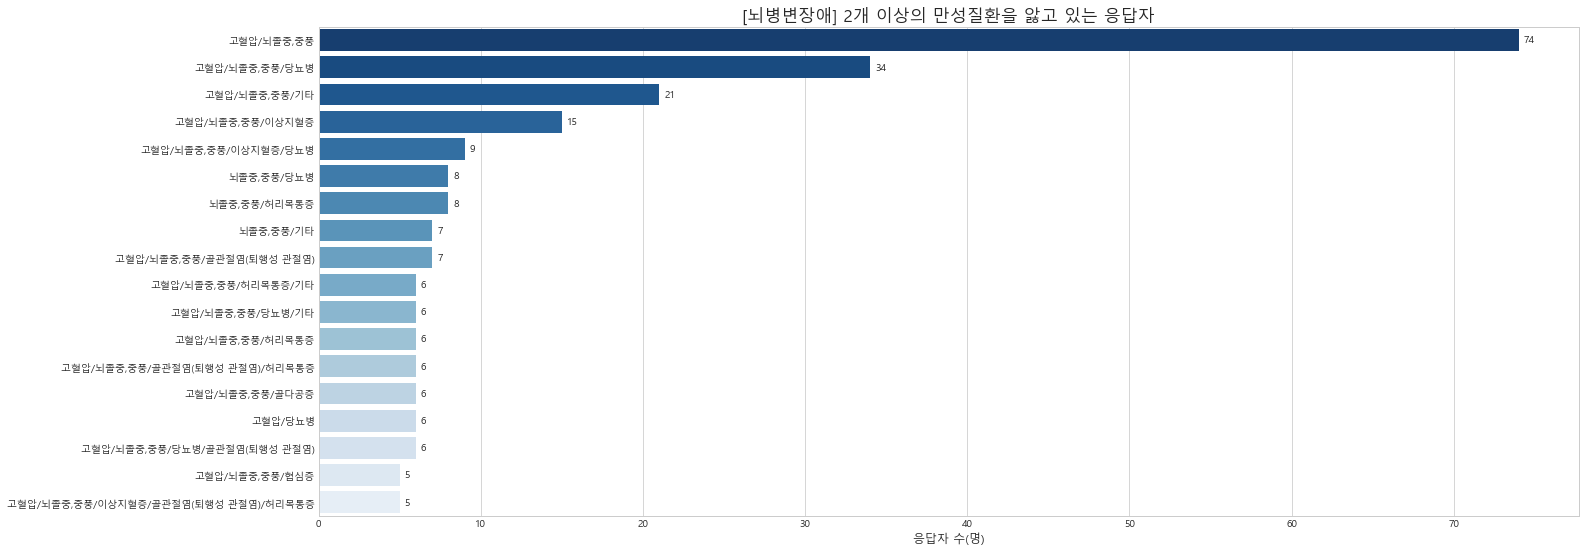

In [148]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(25, 9)

five_df = a.loc[a['counts']>= 5]

palette = sns.color_palette("Blues", n_colors=19) 
palette.reverse() # 색상 진한 정도 거꾸로

splot= sns.barplot(data = five_df, y='disease_group', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# plt.xticks(rotation = 90)
ax.set_title('[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 응답자', size = 17)
ax.set_xlabel('응답자 수(명)', size = 12)
# plt.yticks(rotation=30)
ax.set_ylabel('')

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 응답자.png", dpi=300)
plt.show()

---
### 2개 이상의 질환을 가진 **뇌졸중(뇌경색, 뇌출혈) 응답자**가 가장 많이 앓고 있는 만성질환 (438명 존재)

[순서]
1. **df의 "주된 진단명(1)"에서 뇌졸중(뇌경색, 뇌출혈) (2)만 출력 → "stroke_df"라고 저장 >> 앞으로 뇌졸중 응답자 분석은 해당 데이터 사용!!!**
1. **만성질환 관련 문항 모두 추출 → "disease_stroke"라고 저장 >> 앞으로 뇌졸중 응답자 만성질환 관련 분석은 해당 데이터 사용!!!**
1. '만성질환 유무'에서 2 값 제거('아니오' 응답) + 만성질환 종류를 묻는 문항만 추출 ".iloc[:, 1:26]" 사용 → "stroke_data"라고 저장
1. 2 -> 0으로 변경하여 행별로 앓고 있는 만성질환 개수(sum) 출력 ("counts" 변수 생성)
1. "counts >=2" 행만 추출 → "more_stroke_df"로 저장
1. 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
1. 1 값을 해당 컬럼명(=만성질환명)으로 변환
1. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼("Full name") 생성 및 불용어 처리
1. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(b) 생성

In [4]:
# 1. stroke_info 생성
stroke_df = df[(df['주된 진단명(1)']==2)]
stroke_df.head() # 행 개수: 476개

# 2. 만성질환 관련 문항 모두 추출 → "disease_stroke"라고 저장
disease_stroke = stroke_df.iloc[:, 209:247]
disease_stroke.head()

,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),...,혈당관리 치료 여부,혈당치료 - 인슐린주사,혈당치료 - 당뇨병약,혈당치료 - 비약물요법,혈당치료 - 기타,관절통증 정도,우울증 치료 여부,암 종류1,암 종류2,암 종류3
13,1,1,1,1,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,0
15,1,2,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
42,1,1,1,2,2,2,1,2,2,1,...,1,2,1,2,2,0,0,0,0,0
85,1,1,1,2,1,1,2,2,2,2,...,0,0,0,0,0,5,0,8,0,0
118,1,1,1,2,2,2,1,2,2,2,...,1,2,1,2,2,4,0,0,0,0


In [171]:
# 3. '만성질환 유무'에서 2 값 제거('아니오' 응답) + 만성질환 종류를 묻는 문항만 추출 → "stroke_data"라고 저장
stroke_data = disease_stroke[(disease_stroke['만성질환 유무']) != 2].iloc[:, 1:26]
stroke_data.head() # 행 개수: 471개

# 4. 2 -> 0으로 변경하여 행별로 앓고 있는 만성질환 개수(sum) 출력 ("counts" 변수 생성)
stroke_col = stroke_data.columns.tolist()
for i in range(len(stroke_col)):
    stroke_data.replace({stroke_col[i]: 2}, {stroke_col[i]: 0}, inplace=True)
stroke_data

# 개인당 보유하고 있는 만성질환 수, 'counts' 변수 생성
stroke_data['counts'] = np.sum(stroke_data, axis = 1) 

stroke_data.head()

# 5. "counts >=2" 행만 추출 → "more_stroke_df"로 저장
more_stroke_df = stroke_data[stroke_data['counts'] >= 2] 
more_stroke_df.head() # 행 개수: 438개

# 6. 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
# 컬럼명 변경
new_name = []

stroke_col_lst = more_stroke_df.columns.tolist()
for i in range(len(stroke_col_lst)):
    new_name.append(stroke_col_lst[i][9 : -1]) # 필요없는 부분 삭제

more_stroke_df.columns = new_name

more_stroke_df.rename(columns={'': 'counts'}, inplace=True)
more_stroke_df.head()

# 7. 1 값을 해당 컬럼명(=만성질환명)으로 변환
more_stroke_df = more_stroke_df.iloc[:, :-1]

for i in range(len(more_stroke_df.columns)): # 열 개수
    for j in range(len(more_stroke_df.index)): # 행 개수
        if more_stroke_df.iloc[j, i] == 0:
            pass
        else:
            more_stroke_df.iloc[j, i] = more_stroke_df.columns[i]
            
more_stroke_df.head()

# 8. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
cols = more_stroke_df.columns
more_stroke_df['Full Name'] = more_stroke_df[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
more_stroke_df.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0-'과 '-0' 문자열을 없앤다.)
import re

text_mod2=[]
for i in range(len(more_stroke_df)):
    text_mod2.append(re.sub('0/', "", more_stroke_df['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod3 = []
for i in range(len(text_mod2)):
    text_mod3.append(re.sub('/0', "", text_mod2[i])) # '-0' 제거
    
# 9. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(b) 생성
b = pd.DataFrame(text_mod3)
b.rename(columns={0: 'name'}, inplace=True)
b = b.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
b.rename(columns={'name':'disease_group', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(b.head())
print('\n')
print('행 개수:', len(b))

# 위의 각 만성질환 그룹별로 개수 파악한 데이터(b)를 저장
# b.to_excel('pydata/뇌졸중_2개 이상 앓고 있는 만성질환.xlsx', sheet_name='뇌졸중_2개 이상 앓고 있는 만성질환', index=False)

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


In [181]:
b

,disease_group,counts
2,"고혈압/뇌졸중,중풍",72
18,"고혈압/뇌졸중,중풍/당뇨병",34
17,"고혈압/뇌졸중,중풍/기타",21
78,"고혈압/뇌졸중,중풍/이상지혈증",15
89,"고혈압/뇌졸중,중풍/이상지혈증/당뇨병",9
...,...,...
72,"고혈압/뇌졸중,중풍/심근경색증/협심증/이상지혈증/천식/골관절염(퇴행성 관절염)/골다...",1
75,"고혈압/뇌졸중,중풍/우울증/기타",1
77,"고혈압/뇌졸중,중풍/위십이지장궤양/허리목통증",1
79,"고혈압/뇌졸중,중풍/이상지혈증/간경변증/우울증/기타",1


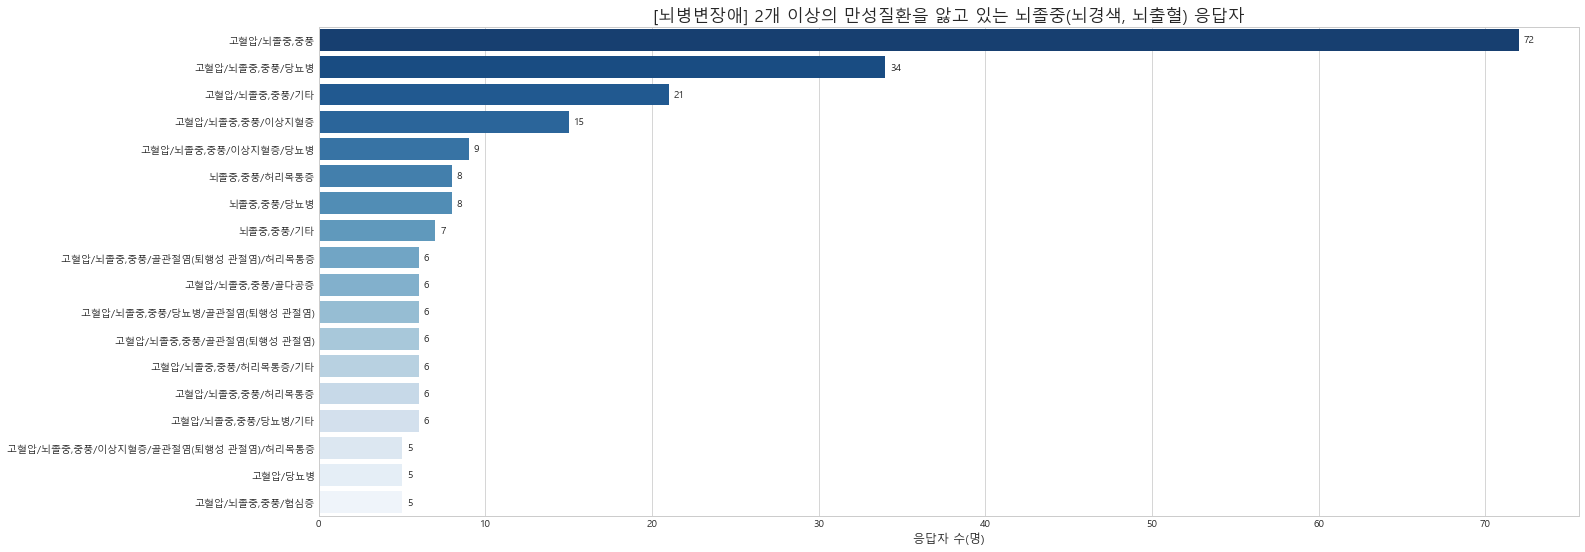

In [182]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(25, 9)

five_df1 = b.loc[b['counts']>= 5]

palette = sns.color_palette("Blues", n_colors=18) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = five_df1, y='disease_group', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# plt.xticks(rotation = 90)
ax.set_title('[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 뇌졸중(뇌경색, 뇌출혈) 응답자', size = 17)
ax.set_xlabel('응답자 수(명)', size = 12)
# plt.yticks(rotation=30)
ax.set_ylabel('')

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 뇌졸중(뇌경색, 뇌출혈) 응답자.png", dpi=300)
plt.show()

---
### 2개 이상의 질환을 가진 **뇌손상 응답자**가 가장 많이 앓고 있는 만성질환 (31명 존재)

[순서]
1. **df의 "주된 진단명(1)"에서 뇌손상 (3)만 출력 → "brain_damage_df"라고 저장 >> 앞으로 뇌손상 응답자 분석은 해당 데이터 사용!!!**
1. **만성질환 관련 문항 모두 추출 → "disease_brain_damage"라고 저장 >> 앞으로 뇌손상 응답자 만성질환 관련 분석은 해당 데이터 사용!!!**
1. '만성질환 유무'에서 2 값 제거('아니오' 응답) + 만성질환 종류를 묻는 문항만 추출 ".iloc[:, 1:26]" 사용 → "brain_damage_data"라고 저장
1. 2 -> 0으로 변경하여 행별로 앓고 있는 만성질환 개수(sum) 출력 ("counts" 변수 생성)
1. "counts >=2" 행만 추출 → "more_brain_damage_df"로 저장
1. 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
1. 1 값을 해당 컬럼명(=만성질환명)으로 변환
1. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼("Full name") 생성 및 불용어 처리
1. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(c) 생성

In [5]:
# 1. brain_damage_df 생성
brain_damage_df = df[(df['주된 진단명(1)']==3)]
brain_damage_df.head() # 행 개수: 78

# 2. 만성질환 관련 문항 모두 추출 → "disease_brain_damage"라고 저장
disease_brain_damage = brain_damage_df.iloc[:, 209:247]
disease_brain_damage.head()

,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),...,혈당관리 치료 여부,혈당치료 - 인슐린주사,혈당치료 - 당뇨병약,혈당치료 - 비약물요법,혈당치료 - 기타,관절통증 정도,우울증 치료 여부,암 종류1,암 종류2,암 종류3
228,1,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
229,1,1,2,2,2,2,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
236,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,99,0,0,0,0
238,1,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,2,2,0,0,0
239,1,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# 3. '만성질환 유무'에서 2 값 제거('아니오' 응답) + 만성질환 종류를 묻는 문항만 추출 → "brain_damage_data"라고 저장
brain_damage_data = disease_brain_damage[(disease_brain_damage['만성질환 유무']) != 2].iloc[:, 1:26]
brain_damage_data.head() # 행 개수: 57(만성질환 보유한 자 수) (만성질환 미보유: 21명)

# 4. 2 -> 0으로 변경하여 행별로 앓고 있는 만성질환 개수(sum) 출력 ("counts" 변수 생성)
damage_data_col = brain_damage_data.columns.tolist()
for i in range(len(damage_data_col)):
    brain_damage_data.replace({damage_data_col[i]: 2}, {damage_data_col[i]: 0}, inplace=True)
brain_damage_data

# 개인당 보유하고 있는 만성질환 수, 'counts' 변수 생성
brain_damage_data['counts'] = np.sum(brain_damage_data, axis = 1) 

brain_damage_data.head()

# 5. "counts >=2" 행만 추출
more_brain_damage_df = brain_damage_data[brain_damage_data['counts'] >= 2] 
more_brain_damage_df.head() # 행 개수: 31 (단일 만성질환: 26명)

# 6. 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
# 컬럼명 변경
new_name2 = []

brain_damage_col_lst = more_brain_damage_df.columns.tolist()
for i in range(len(brain_damage_col_lst)):
    new_name2.append(brain_damage_col_lst[i][9 : -1]) # 필요없는 부분 삭제

more_brain_damage_df.columns = new_name2

more_brain_damage_df.rename(columns={'': 'counts'}, inplace=True)
more_brain_damage_df.head()

# 7. 1 값을 해당 컬럼명(=만성질환명)으로 변환
more_brain_damage_df = more_brain_damage_df.iloc[:, :-1]

for i in range(len(more_brain_damage_df.columns)): # 열 개수
    for j in range(len(more_brain_damage_df.index)): # 행 개수
        if more_brain_damage_df.iloc[j, i] == 0:
            pass
        else:
            more_brain_damage_df.iloc[j, i] = more_brain_damage_df.columns[i]
            
more_brain_damage_df.head()

# 8. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
cols2 = more_brain_damage_df.columns
more_brain_damage_df['Full Name'] = more_brain_damage_df[cols2].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
more_brain_damage_df.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0-'과 '-0' 문자열을 없앤다.)
import re

text_mod4=[]
for i in range(len(more_brain_damage_df)):
    text_mod4.append(re.sub('0/', "", more_brain_damage_df['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod5 = []
for i in range(len(text_mod4)):
    text_mod5.append(re.sub('/0', "", text_mod4[i])) # '-0' 제거
    
# 9. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(b) 생성
c = pd.DataFrame(text_mod5)
c.rename(columns={0: 'name'}, inplace=True)
c = c.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
c.rename(columns={'name':'disease_group', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(c.head())
print('\n')
print('행 개수:', len(c))

# 위의 각 만성질환 그룹별로 개수 파악한 데이터(c)를 저장
# c.to_excel('pydata/뇌손상_2개 이상 앓고 있는 만성질환.xlsx', sheet_name='뇌손상_2개 이상 앓고 있는 만성질환', index=False)

                        disease_group  counts
20                             우울증/기타       4
24                           허리목통증/기타       3
4                          고혈압/뇌졸중,중풍       2
13  고혈압/심근경색증/협심증/골관절염(퇴행성 관절염)/허리목통증       1
23                             피부염/기타       1


행 개수: 25


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [185]:
c

,disease_group,counts
20,우울증/기타,4
24,허리목통증/기타,3
4,"고혈압/뇌졸중,중풍",2
13,고혈압/심근경색증/협심증/골관절염(퇴행성 관절염)/허리목통증,1
23,피부염/기타,1
22,이상지혈증/당뇨병/기타,1
21,위십이지장궤양/우울증,1
19,심근경색증/이상지혈증/기타,1
18,"뇌졸중,중풍/이상지혈증/피부염",1
17,골관절염(퇴행성 관절염)/골다공증/허리목통증/기타,1


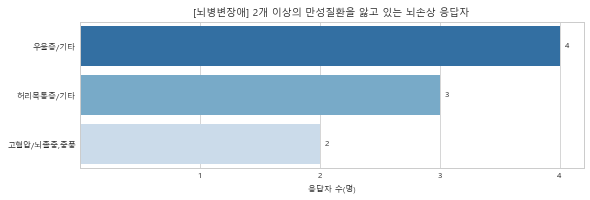

In [252]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 3)

one_df1 = c.loc[c['counts'] >= 2]

palette = sns.color_palette("Blues", n_colors=3) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = one_df1, y='disease_group', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax.set_title('[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 뇌손상 응답자', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks([1, 2, 3, 4])
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 2개 이상의 만성질환을 앓고 있는 뇌손상 응답자.png", dpi=300)
plt.show()

---
### 하나의 만성질환을 앓고 있는 뇌졸중(뇌경색, 뇌출혈) 응답자가 가장 많이 앓고 있는 만성질환 (33명 존재)

In [238]:
# stroke_data 데이터로 시작!
stroke_data.head()

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타),counts
13,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5
15,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,5
42,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
85,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,9
118,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [223]:
one_stroke = stroke_data[stroke_data['counts'] == 1]

# 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
new_name3 = []

one_stroke_col_lst = one_stroke.columns.tolist()
for i in range(len(one_stroke_col_lst)):
    new_name3.append(one_stroke_col_lst[i][9 : -1]) # 필요없는 부분 삭제

one_stroke.columns = new_name3

one_stroke.rename(columns={'': 'counts'}, inplace=True)
one_stroke.head()

# 열 별로 각각 합계 계산
one_stroke_final = pd.DataFrame(np.sum(one_stroke, axis = 0)).reset_index().rename(columns={'index': 'disease_name', 0: 'counts'}).sort_values(by='counts', ascending = False).iloc[1:]
one_stroke_final

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,disease_name,counts
1,"뇌졸중,중풍",26
0,고혈압,3
24,기타,2
19,허리목통증,1
17,골다공증,1
3,협심증,0
15,골관절염(퇴행성 관절염),0
23,암,0
22,우울증,0
21,백내장,0


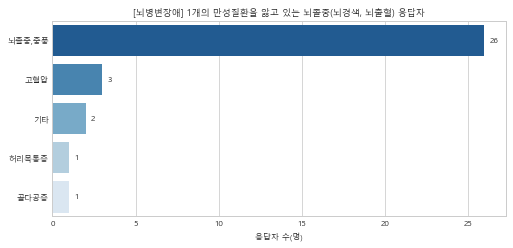

In [253]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 4)

palette = sns.color_palette("Blues", n_colors=5) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = one_stroke_final.head(5), y = 'disease_name', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax.set_title('[뇌병변장애] 1개의 만성질환을 앓고 있는 뇌졸중(뇌경색, 뇌출혈) 응답자', size = 9)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 1개의 만성질환을 앓고 있는 뇌졸중(뇌경색, 뇌출혈) 응답자.png", dpi=300)
plt.show()

---
### 하나의 만성질환을 앓고 있는 뇌손상 응답자가 가장 많이 앓고 있는 만성질환 (26명 존재)

In [239]:
# brain_damage_data 데이터로 시작!
brain_damage_data.head()

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타),counts
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
229,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
238,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,4
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [244]:
one_brain_damage = brain_damage_data[brain_damage_data['counts'] == 1]

# 각 컬럼명에서 필요한 문자열만 추출(만성질환명만 추출되도록 한다.)
new_name4 = []

one_brain_damage_col_lst = brain_damage_data.columns.tolist()
for i in range(len(one_brain_damage_col_lst)):
    new_name4.append(one_brain_damage_col_lst[i][9 : -1]) # 필요없는 부분 삭제

one_brain_damage.columns = new_name4

one_brain_damage.rename(columns={'': 'counts'}, inplace=True)
one_brain_damage.head()

# 열 별로 각각 합계 계산
one_brain_damage_final = pd.DataFrame(np.sum(one_brain_damage, axis = 0)).reset_index().rename(columns={'index': 'disease_name', 0: 'counts'}).sort_values(by='counts', ascending = False).iloc[1:]
one_brain_damage_final

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,disease_name,counts
24,기타,16
0,고혈압,3
19,허리목통증,2
1,"뇌졸중,중풍",2
15,골관절염(퇴행성 관절염),2
10,위십이지장궤양,1
3,협심증,0
16,류마티스 관절염,0
2,심근경색증,0
23,암,0


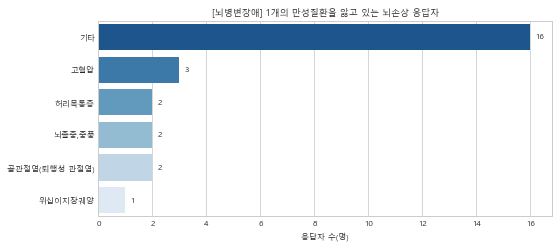

In [254]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 4)

palette = sns.color_palette("Blues", n_colors=6) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = one_brain_damage_final.head(6), y = 'disease_name', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax.set_title('[뇌병변장애] 1개의 만성질환을 앓고 있는 뇌손상 응답자', size = 9)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 1개의 만성질환을 앓고 있는 뇌손상 응답자.png", dpi=300)
plt.show()

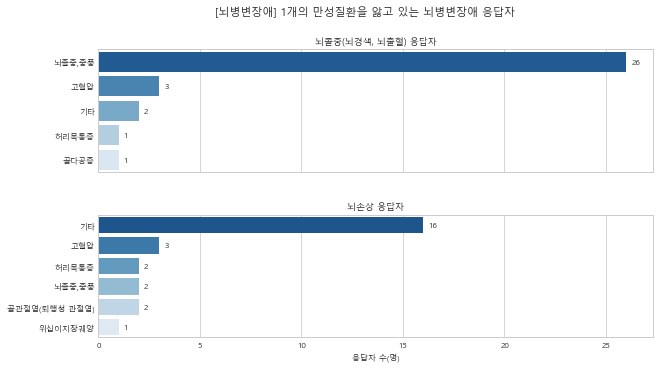

In [349]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
fig.set_size_inches(10, 5) 

## ax1
palette1 = sns.color_palette("Blues", n_colors=5) 
palette1.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = one_stroke_final.head(5), y = 'disease_name', x='counts', palette=palette1, ax=ax1)

for p in splot.patches:
    ax1.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax1.set_title('뇌졸중(뇌경색, 뇌출혈) 응답자', size = 9)
ax1.set_xlabel('', size = 20)
ax1.set_ylabel('')
ax1.tick_params(axis = 'x', labelsize = 8) # x축 눈금 크기 조절
ax1.tick_params(axis = 'y', labelsize = 8) # y축 눈금 크기 조절

## ax2
palette2 = sns.color_palette("Blues", n_colors=6) 
palette2.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = one_brain_damage_final.head(6), y = 'disease_name', x='counts', palette=palette2, ax=ax2)

for p in splot.patches:
    ax2.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax2.set_title('뇌손상 응답자', size = 9)
ax2.set_xlabel('응답자 수(명)', size = 8)
ax2.set_ylabel('')
ax2.tick_params(axis = 'x', labelsize = 8) # x축 눈금 크기 조절
ax2.tick_params(axis = 'y', labelsize = 8) # y축 눈금 크기 조절

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정

fig.suptitle('[뇌병변장애] 1개의 만성질환을 앓고 있는 뇌병변장애 응답자', fontsize=11, y = 1.02)
plt.subplots_adjust(left=0.13, bottom=0.1,  right=0.9, top=.9, wspace=0.2, hspace=0.35)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 1개의 만성질환을 앓고 있는 응답자.png", dpi=300)
plt.show()

---
### 고혈압
#### 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈압약 복용 여부 및 복용 일수

In [8]:
disease_stroke['01)만성질환명(고혈압)'].value_counts()

1    375
2     96
0      5
Name: 01)만성질환명(고혈압), dtype: int64

1: 고혈압 있음  
2: 고혈압 없음  
0: 만성질환 없음(비해당)

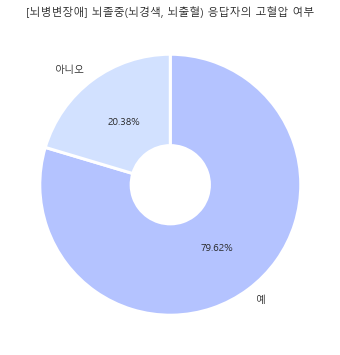

In [27]:
# 뇌졸중(뇌경색, 뇌출혈) 응답자의 고혈압 여부
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

ratios = [375, 96]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 고혈압 여부', size = 11)

plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 고혈압 여부.png", dpi=300)
plt.show()

In [32]:
# 고혈압 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈압약 복용 여부 및 복용 일수
disease_stroke[disease_stroke['01)만성질환명(고혈압)'] == 1][['혈압약 복용 여부', '월 혈압약 일수']].groupby(['혈압약 복용 여부', '월 혈압약 일수'])[['혈압약 복용 여부', '월 혈압약 일수']].count()

혈압약 복용 여부  월 혈압약 일수
혈압약 복용 여부 월 혈압약 일수                     
1         14                1         1
          30              371       371
2         0                 3         3

1: 혈압약 복용 중 >> 372명  
2: 혈압약 복용 하지 않음 >> 3명

In [58]:
pd.DataFrame({'x':['14일', '30일'], 'y': [1, 371]})

,x,y
0,14일,1
1,30일,371


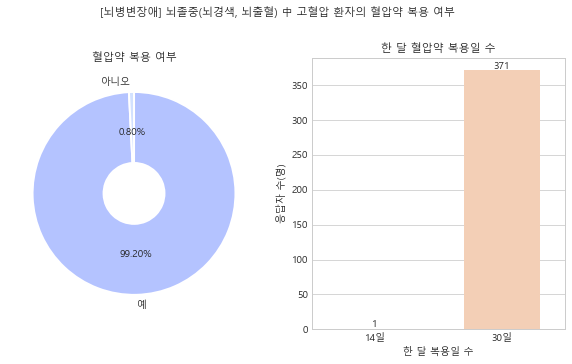

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 5)

## ax1
ratios = [372, 3]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

ax1.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax1.set_title('혈압약 복용 여부', size = 11)

## ax2
splot = sns.barplot(data = pd.DataFrame({'x':['14일', '30일'], 'y': [1, 371]}), 
                  x = pd.DataFrame({'x':['14일', '30일'], 'y': [1, 371]})['x'],
                  y = pd.DataFrame({'x':['14일', '30일'], 'y': [1, 371]})['y'],
                   palette='Pastel2')
ax2.set_xlabel('한 달 복용일 수')
ax2.set_ylabel('응답자 수(명)')
ax2.set_title('한 달 혈압약 복용일 수', size = 11)

for bar in splot.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

# seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax2, .6)    
    
fig.suptitle('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 고혈압 환자의 혈압약 복용 여부', fontsize=11, y = 1.02)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 고혈압 환자의 혈압약 복용 여부.png", dpi=300)
plt.show()

---
#### 뇌손상 응답자의 혈압약 복용 여부 및 복용 일수

In [127]:
disease_brain_damage['01)만성질환명(고혈압)'].value_counts()

2    38
0    21
1    19
Name: 01)만성질환명(고혈압), dtype: int64

1: 고혈압 있음  
2: 고혈압 없음  
0: 만성질환 없음(비해당)

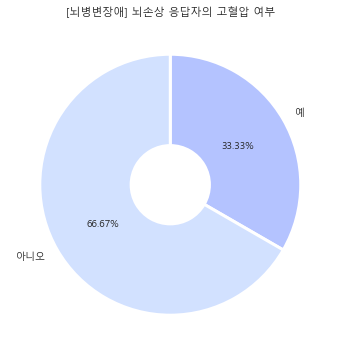

In [130]:
# 뇌손상 응답자의 고혈압 여부
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

ratios = [19, 38]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax.set_title('[뇌병변장애] 뇌손상 응답자의 고혈압 여부', size = 11)

plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 고혈압 여부.png", dpi=300)
plt.show()

In [132]:
# 고혈압 뇌손상 응답자의 혈압약 복용 여부 및 복용 일수
disease_brain_damage[disease_brain_damage['01)만성질환명(고혈압)'] == 1][['혈압약 복용 여부', '월 혈압약 일수']].groupby(['혈압약 복용 여부', '월 혈압약 일수'])[['혈압약 복용 여부', '월 혈압약 일수']].count()

,,혈압약 복용 여부,월 혈압약 일수
혈압약 복용 여부,월 혈압약 일수,,
1,30,19,19


1: 혈압약 복용 중 >> 372명  
2: 혈압약 복용 하지 않음 >> 3명

In [58]:
pd.DataFrame({'x':['14일', '30일'], 'y': [0, 19]})

,x,y
0,14일,1
1,30일,371


<ipython-input-139-721c69534c6b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0, 5, 10, 15, 20])


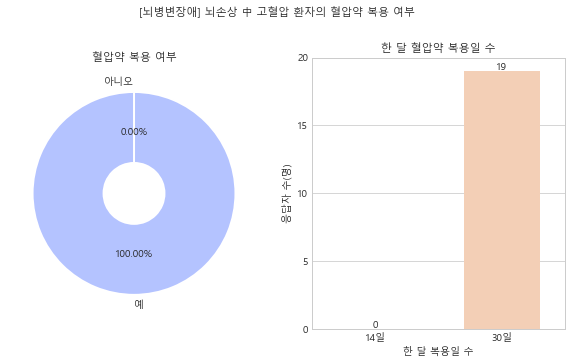

In [139]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10, 5)

## ax1
ratios = [19, 0]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

ax1.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax1.set_title('혈압약 복용 여부', size = 11)

## ax2
splot = sns.barplot(data = pd.DataFrame({'x':['14일', '30일'], 'y': [0, 19]}), 
                  x = pd.DataFrame({'x':['14일', '30일'], 'y': [0, 19]})['x'],
                  y = pd.DataFrame({'x':['14일', '30일'], 'y': [0, 19]})['y'],
                   palette='Pastel2')
ax2.set_xlabel('한 달 복용일 수')
ax2.set_ylabel('응답자 수(명)')
ax2.set_title('한 달 혈압약 복용일 수', size = 11)
ax2.set_yticklabels([0, 5, 10, 15, 20])
ax2.yaxis.set_ticks(np.linspace(0,20,5)) # y축 눈금 설정

for bar in splot.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

# seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax2, .6)    
    
fig.suptitle('[뇌병변장애] 뇌손상 中 고혈압 환자의 혈압약 복용 여부', fontsize=11, y = 1.02)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 中 고혈압 환자의 혈압약 복용 여부.png", dpi=300)
plt.show()

---
### 당뇨병
#### 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈당 치료 여부 및 치료 방법
#### - 당뇨병 및 혈당 치료 여부

In [151]:
disease_stroke['06)만성질환명(당뇨병)'].value_counts()

2    313
1    158
0      5
Name: 06)만성질환명(당뇨병), dtype: int64

1: 당뇨병 있음  
2: 당뇨병 없음  
0: 만성질환 없음(비해당)

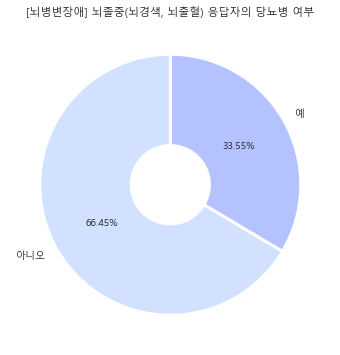

In [155]:
# 뇌졸중(뇌경색, 뇌출혈) 응답자의 당뇨병 여부
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

ratios = [158, 313]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 당뇨병 여부', size = 11)

# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 당뇨병 여부.png", dpi=300)
plt.show()

In [215]:
# 당뇨병 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈당 치료 여부
disease_stroke[disease_stroke['06)만성질환명(당뇨병)'] == 1][['혈당관리 치료 여부']].value_counts()

혈당관리 치료 여부
1             155
2               3
dtype: int64

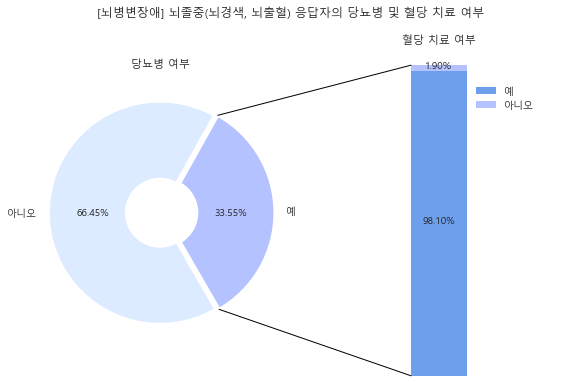

In [277]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [158, 313]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#dcebff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.03, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%0.2f%%', startangle=300, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)
ax1.set_title('당뇨병 여부', size = 11)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [0.9810, 0.0190]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('혈당 치료 여부', size = 11)
ax2.legend(('예', '아니오'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 당뇨병 및 혈당 치료 여부', fontsize=12, y = .98)
plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 당뇨병 및 혈당 치료 여부.png', dpi=300)
plt.show()

#### - 혈당 치료 방법

In [236]:
## 당뇨병 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈당 치료 방법
diabetes_stroke = disease_stroke[disease_stroke['06)만성질환명(당뇨병)'] == 1].loc[disease_stroke['혈당관리 치료 여부'] == 1]
care_diabetes_stroke = diabetes_stroke[['혈당치료 - 인슐린주사', '혈당치료 - 당뇨병약', '혈당치료 - 비약물요법', '혈당치료 - 기타']]
care_diabetes_stroke

,혈당치료 - 인슐린주사,혈당치료 - 당뇨병약,혈당치료 - 비약물요법,혈당치료 - 기타
42,2,1,2,2
118,2,1,2,2
119,2,1,2,2
127,2,1,2,2
203,1,1,1,2
...,...,...,...,...
6378,2,1,1,2
6381,2,1,1,2
6403,2,1,1,2
6414,2,1,1,2


In [237]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_col1 = []

care_col_lst1 = care_diabetes_stroke.columns.tolist()
for i in range(len(care_col_lst1)):
    new_col1.append(care_col_lst1[i][7:]) # 필요없는 부분 삭제

care_diabetes_stroke.columns = new_col1

# 2 -> 0으로 변경
care_stroke_lst = care_diabetes_stroke.columns.tolist()
for i in range(len(care_stroke_lst)):
    care_diabetes_stroke.replace({care_stroke_lst[i]: 2}, {care_stroke_lst[i]: 0}, inplace = True)

# 1값에 해당 컬럼명 넣기 
for i in range(len(care_diabetes_stroke.columns)): # 열 개수
    for j in range(len(care_diabetes_stroke.index)): # 행 개수
        if care_diabetes_stroke.iloc[j, i] == 0:
            pass
        else:
            care_diabetes_stroke.iloc[j, i] = care_diabetes_stroke.columns[i]
            
care_diabetes_stroke.head()

# 8. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
re_cols1 = care_diabetes_stroke.columns
care_diabetes_stroke['Full Name'] = care_diabetes_stroke[re_cols1].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
care_diabetes_stroke.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text_mod6=[]
for i in range(len(care_diabetes_stroke)):
    text_mod6.append(re.sub('0/', "", care_diabetes_stroke['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod7 = []
for i in range(len(text_mod6)):
    text_mod7.append(re.sub('/0', "", text_mod6[i])) # '-0' 제거
    
# 9. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(b) 생성
d = pd.DataFrame(text_mod7)
d.rename(columns={0: 'name'}, inplace=True)
d = d.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
d.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(d.head())
print('\n')
print('행 개수:', len(d))
print('총 응답자 수', d.counts.sum())

              cares  counts
0              당뇨병약      99
1        당뇨병약/비약물요법      43
4        인슐린주사/당뇨병약       7
5  인슐린주사/당뇨병약/비약물요법       4
2             비약물요법       1


행 개수: 6
총 응답자 수 155


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-237-8034ed4e2ffc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

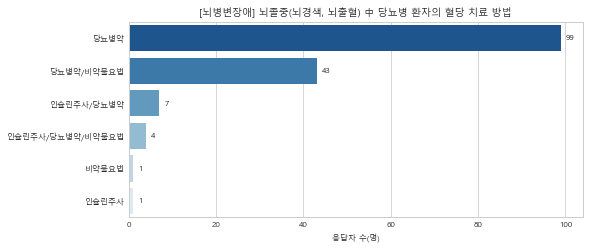

In [298]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 4)

palette = sns.color_palette("Blues", n_colors=6) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = d, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 당뇨병 환자의 혈당 치료 방법', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 당뇨병 환자의 혈당 치료 방법.png", dpi=300)
plt.show()

---
### 당뇨병
### 뇌손상 응답자의 혈당 치료 여부 및 치료 방법
#### - 당뇨병 및 혈당 치료 여부

In [299]:
disease_brain_damage['06)만성질환명(당뇨병)'].value_counts()

2    51
0    21
1     6
Name: 06)만성질환명(당뇨병), dtype: int64

1: 당뇨병 있음  
2: 당뇨병 없음  
0: 만성질환 없음(비해당)

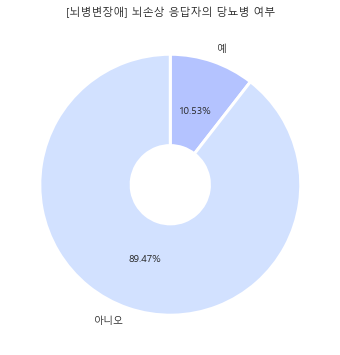

In [300]:
# 뇌손상 응답자의 당뇨병 여부
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

ratios = [6, 51]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax.set_title('[뇌병변장애] 뇌손상 응답자의 당뇨병 여부', size = 11)

# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 당뇨병 여부.png", dpi=300)
plt.show()

In [301]:
# 당뇨병 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈당 치료 여부
disease_brain_damage[disease_brain_damage['06)만성질환명(당뇨병)'] == 1][['혈당관리 치료 여부']].value_counts()

혈당관리 치료 여부
1             6
dtype: int64

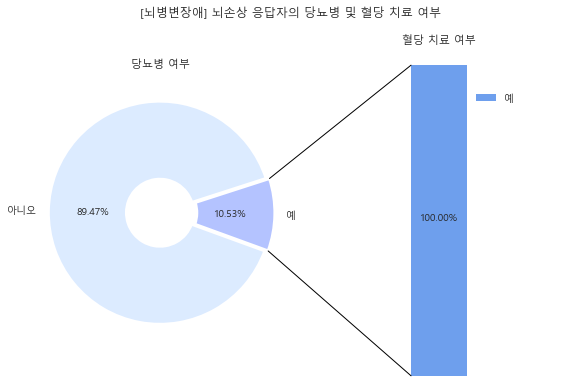

In [310]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [6, 51]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#dcebff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.03, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%0.2f%%', startangle=340, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)
ax1.set_title('당뇨병 여부', size = 11)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [1, ]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('혈당 치료 여부', size = 11)
ax2.legend(('예', '아니오'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌손상 응답자의 당뇨병 및 혈당 치료 여부', fontsize=12, y = .98)
plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 당뇨병 및 혈당 치료 여부.png', dpi=300)
plt.show()

#### - 혈당 치료 방법

In [6]:
## 당뇨병 뇌졸중(뇌경색, 뇌출혈) 응답자의 혈당 치료 방법
diabetes_brain_damage = disease_brain_damage[disease_brain_damage['06)만성질환명(당뇨병)'] == 1].loc[disease_brain_damage['혈당관리 치료 여부'] == 1]
care_diabetes_brain_damage = diabetes_brain_damage[['혈당치료 - 인슐린주사', '혈당치료 - 당뇨병약', '혈당치료 - 비약물요법', '혈당치료 - 기타']]
care_diabetes_brain_damage

,혈당치료 - 인슐린주사,혈당치료 - 당뇨병약,혈당치료 - 비약물요법,혈당치료 - 기타
335,2,1,2,2
612,2,1,2,2
1866,2,1,2,2
3433,2,1,1,2
4038,2,1,1,2
4867,2,1,1,2


In [8]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_col2 = []

care_col_lst2 = care_diabetes_brain_damage.columns.tolist()
for i in range(len(care_col_lst2)):
    new_col2.append(care_col_lst2[i][7:]) # 필요없는 부분 삭제

care_diabetes_brain_damage.columns = new_col2

# 2 -> 0으로 변경
care_brain_damage_lst = care_diabetes_brain_damage.columns.tolist()
for i in range(len(care_brain_damage_lst)):
    care_diabetes_brain_damage.replace({care_brain_damage_lst[i]: 2}, {care_brain_damage_lst[i]: 0}, inplace = True)

# 1값에 해당 컬럼명 넣기 
for i in range(len(care_diabetes_brain_damage.columns)): # 열 개수
    for j in range(len(care_diabetes_brain_damage.index)): # 행 개수
        if care_diabetes_brain_damage.iloc[j, i] == 0:
            pass
        else:
            care_diabetes_brain_damage.iloc[j, i] = care_diabetes_brain_damage.columns[i]
            
care_diabetes_brain_damage.head()

# 8. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
re_cols2 = care_diabetes_brain_damage.columns
care_diabetes_brain_damage['Full Name'] = care_diabetes_brain_damage[re_cols2].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
care_diabetes_brain_damage.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text_mod8=[]
for i in range(len(care_diabetes_brain_damage)):
    text_mod8.append(re.sub('0/', "", care_diabetes_brain_damage['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod9 = []
for i in range(len(text_mod8)):
    text_mod9.append(re.sub('/0', "", text_mod8[i])) # '-0' 제거
    
# 9. 정제한 정보를 이용해 그룹별로 개수를 계산하여 새로운 데이터프레임(b) 생성
e = pd.DataFrame(text_mod9)
e.rename(columns={0: 'name'}, inplace=True)
e = e.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
e.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(e.head())
print('\n')
print('행 개수:', len(e))
print('총 응답자 수', e.counts.sum())

        cares  counts
0        당뇨병약       3
1  당뇨병약/비약물요법       3


행 개수: 2
총 응답자 수 6


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-8-96360805ddb4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [9]:
e

,cares,counts
0,당뇨병약,3
1,당뇨병약/비약물요법,3


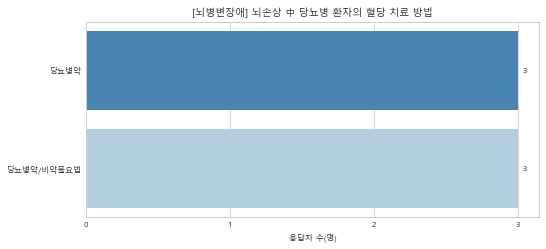

In [38]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 4)

palette = sns.color_palette("Blues", n_colors=2) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = e, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)
    
ax.set_title('[뇌병변장애] 뇌손상 中 당뇨병 환자의 혈당 치료 방법', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.xticks([0, 1, 2, 3])

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 中 당뇨병 환자의 혈당 치료 방법.png", dpi=300)
plt.show()

---
### 골관절염
#### 뇌졸중(뇌경색, 뇌출혈) 응답자의 골관절염(퇴행성 관절염) 여부 및 통증정도
#### - 골관절염 여부

In [41]:
disease_stroke['16)만성질환명(골관절염(퇴행성 관절염))'].value_counts()

2    393
1     78
0      5
Name: 16)만성질환명(골관절염(퇴행성 관절염)), dtype: int64

1: 골관절염 있음  
2: 골관절염 없음  
0: 비해당(만성질환 없음)

In [48]:
stroke_sick = pd.DataFrame(disease_stroke[disease_stroke['16)만성질환명(골관절염(퇴행성 관절염))'] == 1][['관절통증 정도']].value_counts()).reset_index().rename(columns={0: 'counts'})
stroke_sick

,관절통증 정도,counts
0,8,22
1,7,18
2,6,13
3,5,11
4,4,4
5,9,4
6,1,2
7,3,2
8,10,2


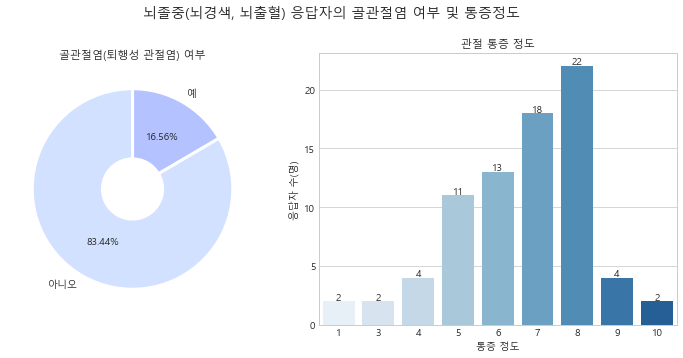

In [69]:
# 뇌졸중(뇌경색, 뇌출혈) 응답자의 골관절염 여부 및 통증정도
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.4, 2]}) # 서브플롯 비율 설정
fig.set_size_inches(12, 5)

## ax1
ratios = [78, 393]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax1.set_title('골관절염(퇴행성 관절염) 여부', size = 11)

## ax2
palette = sns.color_palette("Blues", n_colors=10) 
# palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = stroke_sick, x = '관절통증 정도', y='counts', palette=palette)
ax2.set_title('관절 통증 정도', size = 11)
ax2.set_xlabel('통증 정도')
ax2.set_ylabel('응답자 수(명)')

for bar in splot.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

fig.suptitle('뇌졸중(뇌경색, 뇌출혈) 응답자의 골관절염 여부 및 통증 정도', fontsize=14, y = 1.01)
# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 골관절염 여부 및 통증 정도.png', dpi=300)
plt.show()

---
### 골관절염
#### 뇌손상 응답자의 골관절염(퇴행성 관절염) 여부 및 통증정도
#### - 골관절염 여부

In [70]:
disease_brain_damage['16)만성질환명(골관절염(퇴행성 관절염))'].value_counts()

2    46
0    21
1    11
Name: 16)만성질환명(골관절염(퇴행성 관절염)), dtype: int64

1: 골관절염 있음  
2: 골관절염 없음  
0: 비해당(만성질환 없음)

In [71]:
brain_damage_sick = pd.DataFrame(disease_brain_damage[disease_brain_damage['16)만성질환명(골관절염(퇴행성 관절염))'] == 1][['관절통증 정도']].value_counts()).reset_index().rename(columns={0: 'counts'})
brain_damage_sick

,관절통증 정도,counts
0,5,5
1,7,2
2,2,1
3,4,1
4,6,1
5,8,1


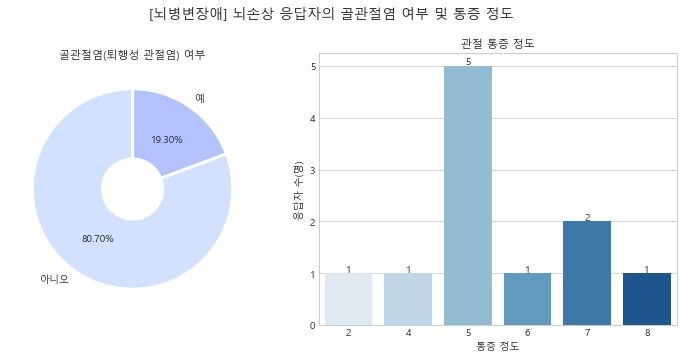

In [78]:
# 뇌졸중(뇌경색, 뇌출혈) 응답자의 골관절염 여부 및 통증정도
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.4, 2]}) # 서브플롯 비율 설정
fig.set_size_inches(12, 5)

## ax1
ratios = [11, 46]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax1.set_title('골관절염(퇴행성 관절염) 여부', size = 11)

## ax2
palette = sns.color_palette("Blues", n_colors=6) 
# palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = brain_damage_sick, x = '관절통증 정도', y='counts', palette=palette)
ax2.set_title('관절 통증 정도', size = 11)
ax2.set_xlabel('통증 정도')
ax2.set_ylabel('응답자 수(명)')

for bar in splot.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 4),
                   textcoords='offset points')

fig.suptitle('[뇌병변장애] 뇌손상 응답자의 골관절염 여부 및 통증 정도', fontsize=14, y = 1.01)
plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 골관절염 여부 및 통증 정도.png', dpi=300)
plt.show()

---
### 우울증
#### 뇌졸중(뇌경색, 뇌출혈) 응답자의 우울증 치료 여부

In [80]:
disease_stroke['23)만성질환명(우울증)'].value_counts()

2    429
1     42
0      5
Name: 23)만성질환명(우울증), dtype: int64

1: 우울증 있음  
2: 우울증 없음  
0: 비해당(만성질환 없음)

In [85]:
disease_stroke[disease_stroke['23)만성질환명(우울증)'] ==1][['우울증 치료 여부']].value_counts()

우울증 치료 여부
1            28
2            14
dtype: int64

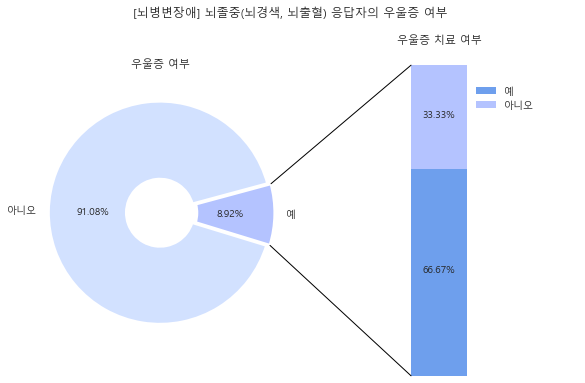

In [103]:
# 시각화
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [42, 429]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.03, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%0.2f%%', startangle=343, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)
ax1.set_title('우울증 여부', size = 11)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [28/42, 14/42]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('우울증 치료 여부', size = 11)
ax2.legend(('예', '아니오'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 우울증 여부', fontsize=12, y = .98)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 우울증 여부.png", dpi=300)
plt.show()

---
#### 뇌손상 응답자의 우울증 치료 여부

In [95]:
disease_brain_damage['23)만성질환명(우울증)'].value_counts()

2    50
0    21
1     7
Name: 23)만성질환명(우울증), dtype: int64

1: 우울증 있음  
2: 우울증 없음  
0: 비해당(만성질환 없음)

In [96]:
disease_brain_damage[disease_brain_damage['23)만성질환명(우울증)'] ==1][['우울증 치료 여부']].value_counts()

우울증 치료 여부
1            5
2            2
dtype: int64

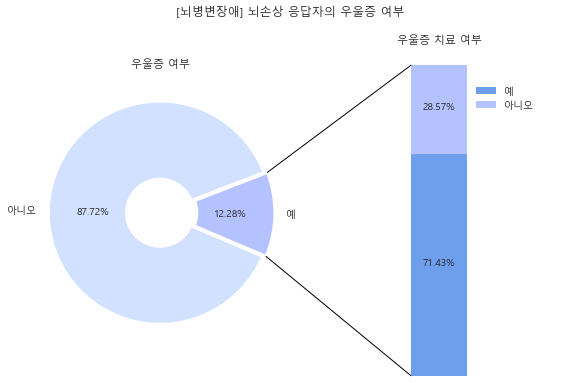

In [102]:
# 시각화
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [7, 50]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.03, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%0.2f%%', startangle=337, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)
ax1.set_title('우울증 여부', size = 11)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [5/7, 2/7]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('우울증 치료 여부', size = 11)
ax2.legend(('예', '아니오'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌손상 응답자의 우울증 여부', fontsize=12, y = .98)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 우울증 여부.png", dpi=300)
plt.show()

---
### 암
#### 뇌졸중(뇌경색, 뇌출혈) 응답자의 암 진단 여부

In [105]:
disease_stroke['24)만성질환명(암)'].value_counts()

2    458
1     13
0      5
Name: 24)만성질환명(암), dtype: int64

1: 암 있음  
2: 암 없음  
0: 비해당(만성질환 없음)

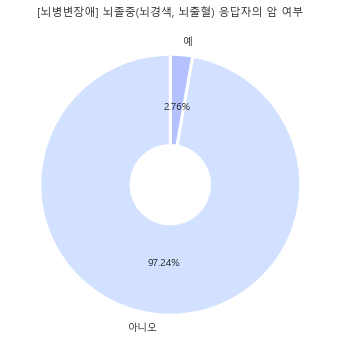

In [164]:
# 뇌졸중(뇌경색, 뇌출혈) 응답자의 암 진단 여부
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

ratios = [13, 458]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(ratios, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, counterclock=False, wedgeprops=wedgeprops)
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 암 여부', size = 11)

plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 암 여부.png", dpi=300)
plt.show()

In [141]:
stroke_cancer = pd.DataFrame(disease_stroke[disease_stroke['24)만성질환명(암)'] == 1][['암 종류1', '암 종류2', '암 종류3']])
stroke_cancer

,암 종류1,암 종류2,암 종류3
85,8,0,0
167,3,0,0
845,4,0,0
1565,2,0,0
1805,4,0,0
2260,10,0,0
3158,3,0,0
3194,2,10,0
3844,6,0,0
3893,8,0,0


In [142]:
stroke_cancer= stroke_cancer.replace({'암 종류1': 1}, {'암 종류1':'갑상선암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 2}, {'암 종류1':'위암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 3}, {'암 종류1':'대장암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 4}, {'암 종류1':'폐암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 5}, {'암 종류1':'간암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 6}, {'암 종류1':'유방암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 8}, {'암 종류1':'전립선암'})
stroke_cancer= stroke_cancer.replace({'암 종류1': 10}, {'암 종류1':'기타'})
stroke_cancer= stroke_cancer.replace({'암 종류2': 10}, {'암 종류2':'기타'})
stroke_cancer

,암 종류1,암 종류2,암 종류3
85,전립선암,0,0
167,대장암,0,0
845,폐암,0,0
1565,위암,0,0
1805,폐암,0,0
2260,기타,0,0
3158,대장암,0,0
3194,위암,기타,0
3844,유방암,0,0
3893,전립선암,0,0


In [143]:
# 8. 행별로 7번에서 처리한 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
cols4 = stroke_cancer.columns[:3]
stroke_cancer['Full Name'] = stroke_cancer[cols4].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
stroke_cancer.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0-'과 '-0' 문자열을 없앤다.)
import re

text_mod10=[]
for i in range(len(stroke_cancer)):
    text_mod10.append(re.sub('0/', "", stroke_cancer['Full Name'].tolist()[i])) # '0-' 제거
    
text_mod11 = []
for i in range(len(text_mod10)):
    text_mod11.append(re.sub('/0', "", text_mod10[i])) # '-0' 제거

In [144]:
print(text_mod11)

['전립선암', '대장암', '폐암', '위암', '폐암', '기타', '대장암', '위암/기타', '유방암', '전립선암', '간암', '갑상선암', '기타']


In [147]:
f = pd.DataFrame(text_mod11)
f.rename(columns={0: 'name'}, inplace=True)
f = f.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
f.rename(columns={'name':'cancer', 'name_Count': 'counts'}, inplace=True)

# 정보 출력
print(f.head())
print('\n')
print('행 개수:', len(f))

  cancer  counts
2     기타       2
3    대장암       2
7   전립선암       2
8     폐암       2
0     간암       1


행 개수: 9


In [148]:
f

,cancer,counts
2,기타,2
3,대장암,2
7,전립선암,2
8,폐암,2
0,간암,1
1,갑상선암,1
4,위암,1
5,위암/기타,1
6,유방암,1


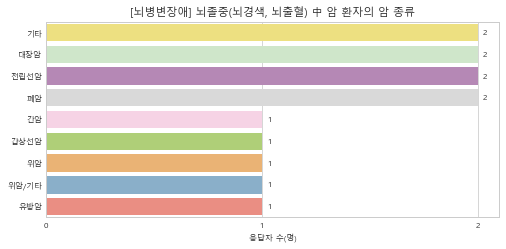

In [162]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 4)

palette = sns.color_palette("Set3") 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = f, y = 'cancer', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 암 환자의 암 종류', size = 11)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.xticks([0, 1, 2])

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 中 암 환자의 암 종류.png", dpi=300)
plt.show()

#### 뇌손상 응답자의 암 진단 여부

In [165]:
disease_brain_damage['24)만성질환명(암)'].value_counts()

2    57
0    21
Name: 24)만성질환명(암), dtype: int64

1: 암 있음  
2: 암 없음  
0: 비해당(만성질환 없음)

---
### 뇌병변장애 응답자의 만성질환별 상관관계 히트맵

In [78]:
main_df = df[['주된 진단명(1)']].reset_index()
main_df

,index,주된 진단명(1)
0,13,2.0
1,15,2.0
2,42,2.0
3,85,2.0
4,118,2.0
...,...,...
549,6513,2.0
550,6525,2.0
551,6536,2.0
552,6537,3.0


In [84]:
sub_df = df.iloc[:, 209:235].reset_index()
sub_df

,index,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),...,16)만성질환명(골관절염(퇴행성 관절염)),17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타)
0,13,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,1
1,15,1,2,1,2,2,2,2,2,2,...,2,2,1,2,2,2,1,2,2,1
2,42,1,1,1,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
3,85,1,1,1,2,1,1,2,2,2,...,1,2,2,2,1,2,1,2,1,1
4,118,1,1,1,2,2,2,1,2,2,...,1,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,6513,1,1,1,2,2,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
550,6525,1,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
551,6536,1,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
552,6537,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [85]:
merge_df = pd.merge(main_df, sub_df, how='inner', on='index').drop(columns='index')
merge_df.rename(columns={'주된 진단명(1)': '주된 진단명'}, inplace=True)
merge_df

,주된 진단명,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),...,16)만성질환명(골관절염(퇴행성 관절염)),17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타)
0,2.0,1,1,1,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,1
1,2.0,1,2,1,2,2,2,2,2,2,...,2,2,1,2,2,2,1,2,2,1
2,2.0,1,1,1,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2.0,1,1,1,2,1,1,2,2,2,...,1,2,2,2,1,2,1,2,1,1
4,2.0,1,1,1,2,2,2,1,2,2,...,1,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2.0,1,1,1,2,2,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
550,2.0,1,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
551,2.0,1,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
552,3.0,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [86]:
merge_df.corr().round(3)

,주된 진단명,만성질환 유무,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),...,16)만성질환명(골관절염(퇴행성 관절염)),17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타)
주된 진단명,1.000,0.425,0.019,0.274,-0.346,-0.359,-0.215,-0.158,-0.401,-0.430,...,-0.323,-0.405,-0.347,-0.423,-0.261,-0.401,-0.369,-0.366,-0.384,-0.432
만성질환 유무,0.425,1.000,-0.529,-0.585,-0.832,-0.890,-0.686,-0.620,-0.949,-0.940,...,-0.727,-0.971,-0.847,-0.962,-0.668,-0.932,-0.905,-0.818,-0.940,-0.656
01)만성질환명(고혈압),0.019,-0.529,1.000,0.494,0.479,0.499,0.466,0.407,0.501,0.516,...,0.450,0.527,0.478,0.493,0.378,0.492,0.484,0.444,0.516,0.245
"02)만성질환명(뇌졸중,중풍)",0.274,-0.585,0.494,1.000,0.495,0.544,0.467,0.439,0.559,0.537,...,0.425,0.576,0.507,0.543,0.405,0.555,0.548,0.457,0.557,0.235
03)만성질환명(심근경색증),-0.346,-0.832,0.479,0.495,1.000,0.820,0.616,0.544,0.790,0.815,...,0.651,0.813,0.719,0.795,0.607,0.774,0.779,0.711,0.774,0.545
04)만성질환명(협심증),-0.359,-0.890,0.499,0.544,0.820,1.000,0.649,0.545,0.840,0.849,...,0.688,0.862,0.771,0.853,0.629,0.832,0.839,0.741,0.840,0.573
05)만성질환명(이상지혈증),-0.215,-0.686,0.466,0.467,0.616,0.649,1.000,0.476,0.641,0.676,...,0.585,0.664,0.634,0.662,0.554,0.667,0.687,0.598,0.669,0.417
06)만성질환명(당뇨병),-0.158,-0.620,0.407,0.439,0.544,0.545,0.476,1.000,0.578,0.590,...,0.465,0.596,0.538,0.593,0.421,0.581,0.610,0.500,0.576,0.365
07)만성질환명(갑상선장애),-0.401,-0.949,0.501,0.559,0.790,0.840,0.641,0.578,1.000,0.890,...,0.683,0.930,0.797,0.911,0.644,0.890,0.854,0.793,0.899,0.631
08)만성질환명(천식),-0.430,-0.940,0.516,0.537,0.815,0.849,0.676,0.590,0.890,1.000,...,0.713,0.912,0.805,0.921,0.657,0.882,0.872,0.776,0.890,0.607


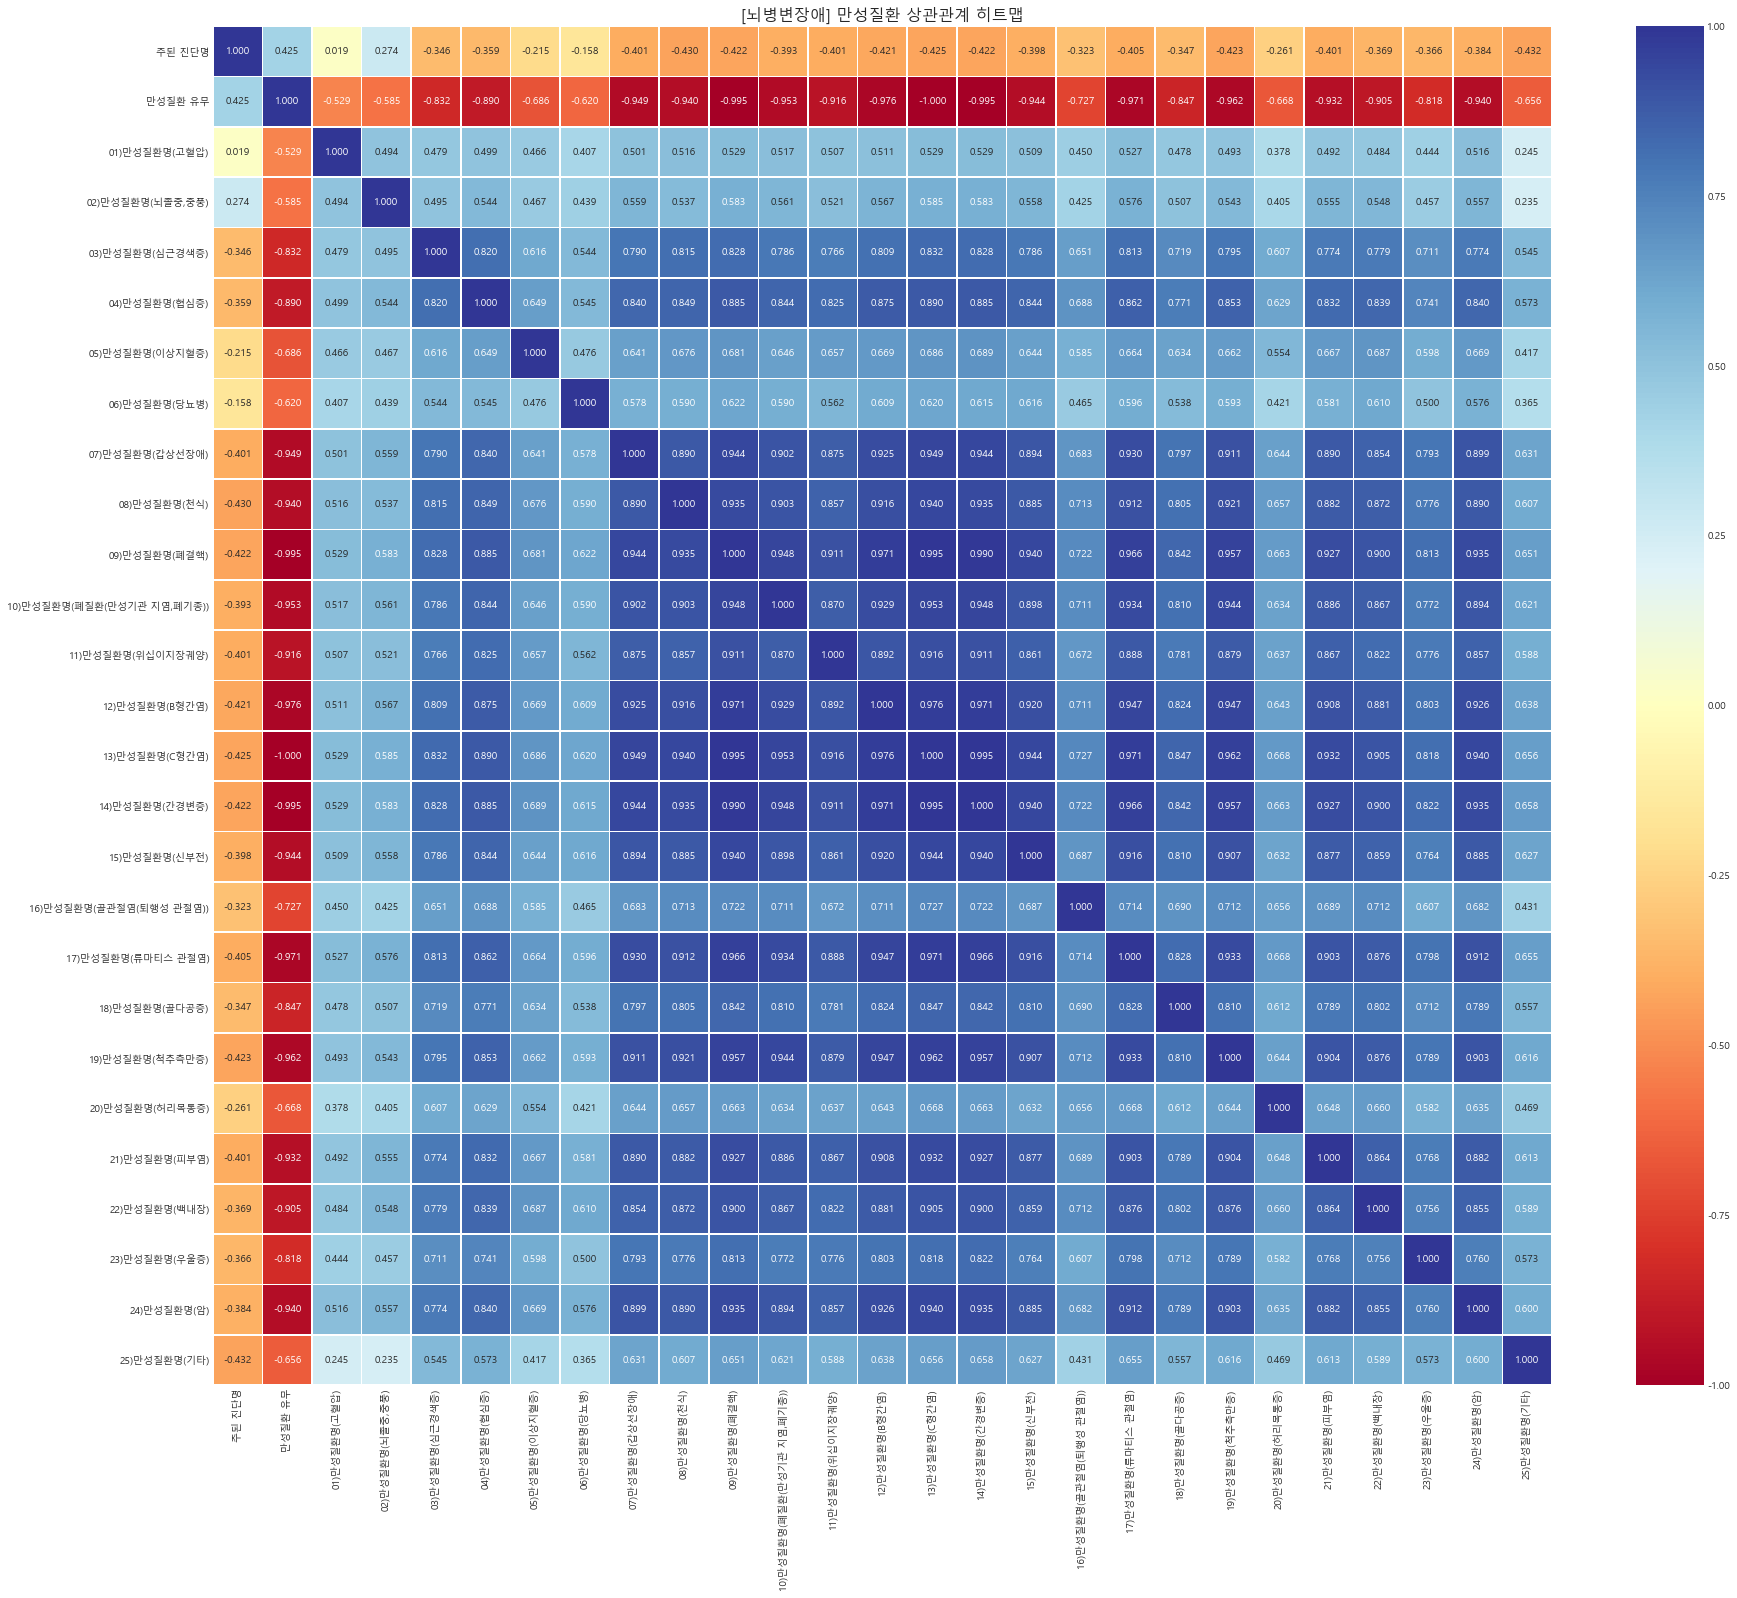

In [90]:
# 히트맵 출력
fig, ax = plt.subplots()
fig.set_size_inches(30, 25)
sns.heatmap(merge_df.corr(), annot=True, cmap='RdYlBu',fmt = '.3f', linewidths=.5)

plt.title('[뇌병변장애] 만성질환 상관관계 히트맵', fontsize=16)
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 만성질환 상관관계 히트맵.png", dpi=300)
plt.show()

<ipython-input-94-ce780e098fd7>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(merge_df.corr(), dtype=np.bool)


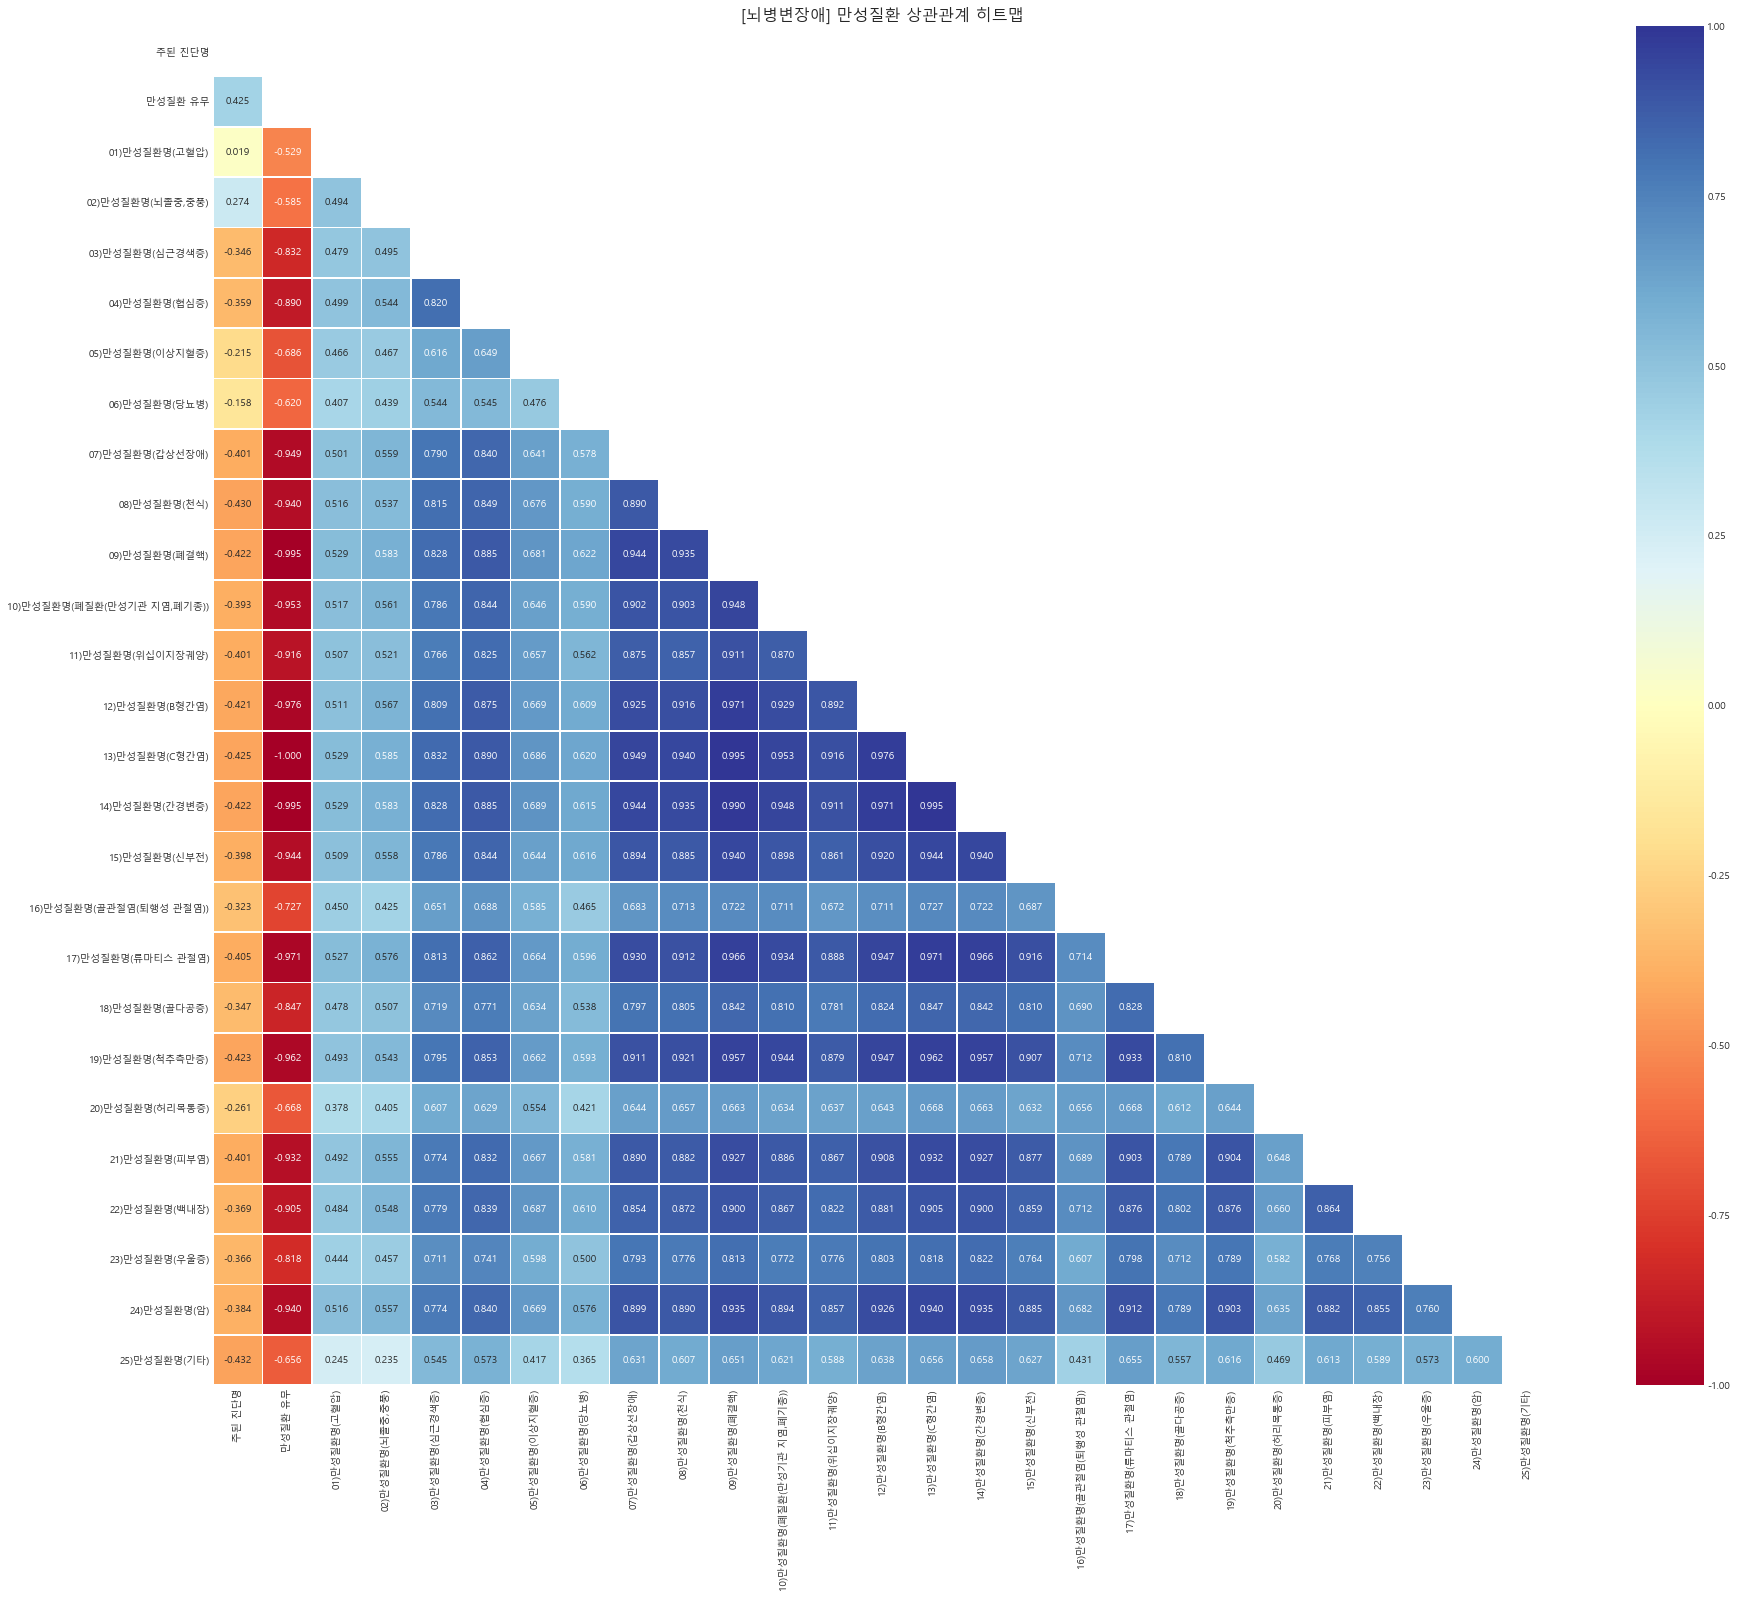

In [94]:
# 아래 히트맵만 출력
fig, ax = plt.subplots()
fig.set_size_inches(30, 25)
# sns.heatmap(merge_df.corr(), annot=True, cmap='RdYlBu',fmt = '.3f', linewidths=.5)

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(merge_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(merge_df.corr(), 
            cmap = 'RdYlBu', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            fmt = '.3f',
            linewidths=.5,  # 경계면 실선으로 구분하기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

plt.title('[뇌병변장애] 만성질환 상관관계 히트맵', fontsize=16)
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 만성질환 상관관계 히트맵.png", dpi=300)
plt.show()

---
### 뇌병변장애인의 만성질환 파레토 차트
[파레토 차트 참고](https://www.debugcn.com/ko/article/41064041.html)  
[line chart value labeling 참고](https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples)  
[hightlight in graph 참고](https://bjy2.tistory.com/120)

In [200]:
# 각 열별로 합 산출 및 필요 없는 문자열 제거
data = pd.DataFrame(disease_df1.iloc[:, :-1].sum(axis = 0)).reset_index()
col_lst2 = data['index'].tolist()

disease_name = []
for i in range(len(col_lst2)):
    disease_name.append(col_lst2[i][9 : -1]) # 필요없는 문자열 제거( '숫자)만성질환명(' , ')' )

data['disease_name'] = disease_name

# 변수명 변경
data.rename(columns={'index':'raw_name', 0:'n'}, inplace=True)
data.sort_values(by = 'n', ascending=False, inplace=True)
data.head()

data["pct"] = round(data["n"].cumsum()/data.n.sum()*100, 2)
data

,raw_name,n,disease_name,pct
1,"02)만성질환명(뇌졸중,중풍)",457,"뇌졸중,중풍",25.82
0,01)만성질환명(고혈압),394,고혈압,48.08
5,06)만성질환명(당뇨병),164,당뇨병,57.34
24,25)만성질환명(기타),134,기타,64.92
19,20)만성질환명(허리목통증),125,허리목통증,71.98
4,05)만성질환명(이상지혈증),113,이상지혈증,78.36
15,16)만성질환명(골관절염(퇴행성 관절염)),89,골관절염(퇴행성 관절염),83.39
22,23)만성질환명(우울증),49,우울증,86.16
2,03)만성질환명(심근경색증),44,심근경색증,88.64
17,18)만성질환명(골다공증),39,골다공증,90.85


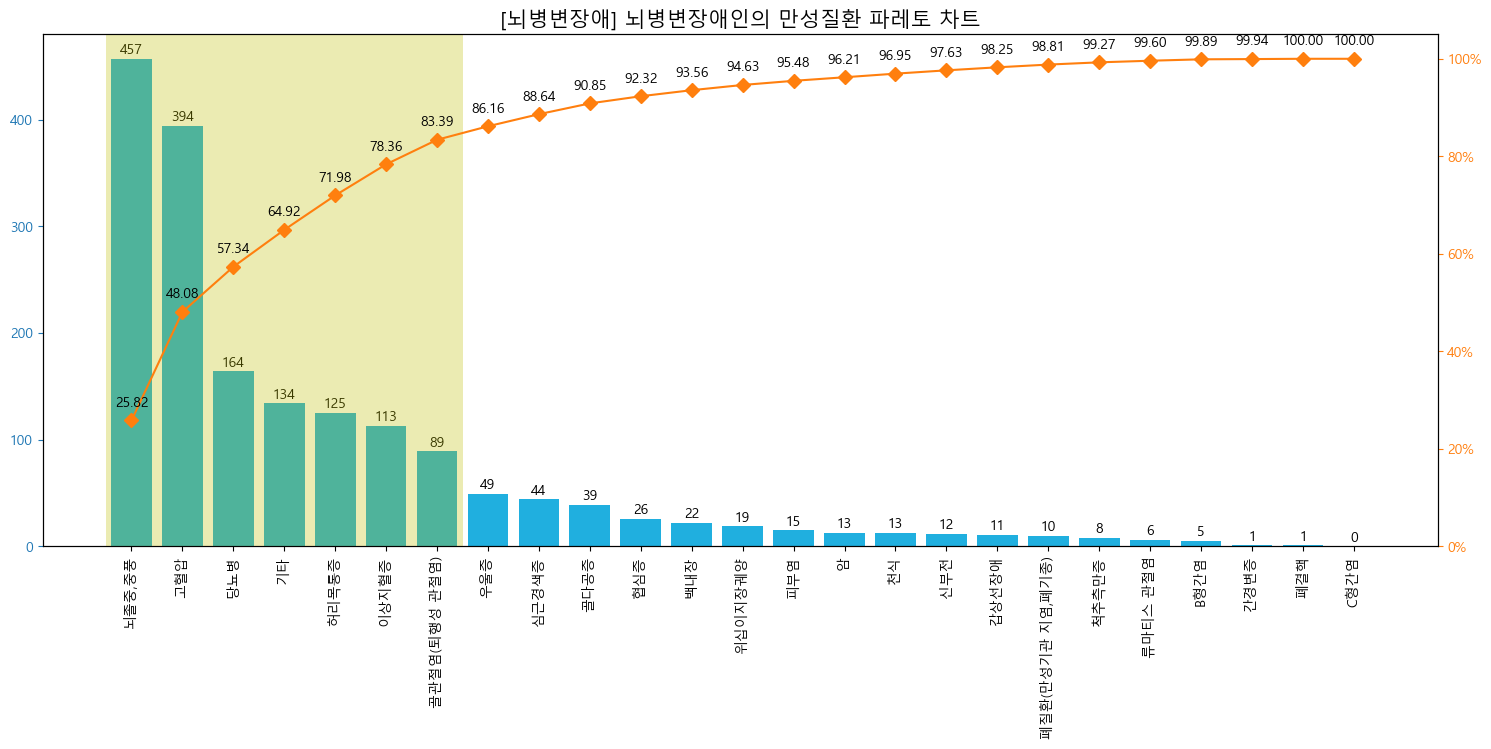

In [286]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

disease_col = data['disease_name'].tolist()

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(18, 8) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=data, x = 'disease_name', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[뇌병변장애] 뇌병변장애인의 만성질환 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(data['disease_name'], data["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(data['disease_name'], data['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 6.5, facecolor='y', alpha=0.3)
plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌병변장애인의 만성질환 파레토 차트.png", dpi=300) # 저장
plt.show()

---
### + 지체장애인의 만성질환 파레토 차트
[그래프 내 천단위 기호 넣기](https://www.google.com/search?q=python+matplotlib+thousands+separator&sxsrf=AOaemvLQIN7trBrkjBYh8J3eIaRfNzZF3w%3A1641365039483&ei=Lz7VYamBHfySr7wP2dqe-AY&ved=0ahUKEwjp1P-ggZr1AhV8yYsBHVmtB28Q4dUDCA4&uact=5&oq=python+matplotlib+thousands+separator&gs_lcp=Cgdnd3Mtd2l6EAM6CAgAEIAEELADOgcIABCwAxAeOgQIIxAnOgYIABAHEB46BAghEApKBAhBGAFKBAhGGABQ6QJYnRpgxBtoA3AAeACAAdQBiAHwEZIBBTAuOC40mAEAoAEByAEKwAEB&sclient=gws-wiz#kpvalbx=_ND7VYduvJ5WVr7wPlPCB8A020)

In [263]:
df1=raw_df[raw_df['지체장애여부']==1] # 지체장애인만 추출
phy_df = df1.loc[df1['만성질환 유무'] != 2].iloc[:, 210:235] # 지체장애 중 만성질환 앓는 사람만 추출
phy_df.head()

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,16)만성질환명(골관절염(퇴행성 관절염)),17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타)
0,2,2,2,2,2,2,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,1
8,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,1,2,2
11,2,2,2,2,2,1,2,2,2,2,...,1,2,2,2,2,2,2,2,2,2


In [264]:
# 2 -> 0으로 변경
phy_col = phy_df.columns.tolist()
for i in range(len(phy_col)):
    phy_df.replace({phy_col[i]: 2}, {phy_col[i]: 0}, inplace=True)
phy_df.head()

,01)만성질환명(고혈압),"02)만성질환명(뇌졸중,중풍)",03)만성질환명(심근경색증),04)만성질환명(협심증),05)만성질환명(이상지혈증),06)만성질환명(당뇨병),07)만성질환명(갑상선장애),08)만성질환명(천식),09)만성질환명(폐결핵),"10)만성질환명(폐질환(만성기관 지염,폐기종))",...,16)만성질환명(골관절염(퇴행성 관절염)),17)만성질환명(류마티스 관절염),18)만성질환명(골다공증),19)만성질환명(척추측만증),20)만성질환명(허리목통증),21)만성질환명(피부염),22)만성질환명(백내장),23)만성질환명(우울증),24)만성질환명(암),25)만성질환명(기타)
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [265]:
# 각 열별로 합 산출 및 필요 없는 문자열 제거
phy_data = pd.DataFrame(phy_df.sum(axis = 0)).reset_index()
phy_col = phy_data['index'].tolist()

In [268]:
disease_name = []
for i in range(len(phy_col)):
    disease_name.append(phy_col[i][9 : -1]) # 필요없는 문자열 제거( '숫자)만성질환명(' , ')' )

phy_data['disease_name'] = disease_name

# 변수명 변경
phy_data.rename(columns={'index':'raw_name', 0:'n'}, inplace=True)
phy_data.sort_values(by = 'n', ascending=False, inplace=True)
phy_data.head()

phy_data["pct"] = round(phy_data["n"].cumsum()/phy_data.n.sum()*100, 2)
phy_data

,raw_name,n,disease_name,pct
0,01)만성질환명(고혈압),1551,고혈압,20.14
19,20)만성질환명(허리목통증),1384,"뇌졸중,중풍",38.11
15,16)만성질환명(골관절염(퇴행성 관절염)),1041,심근경색증,51.62
5,06)만성질환명(당뇨병),703,협심증,60.75
4,05)만성질환명(이상지혈증),565,이상지혈증,68.09
24,25)만성질환명(기타),528,당뇨병,74.94
17,18)만성질환명(골다공증),379,갑상선장애,79.86
21,22)만성질환명(백내장),181,천식,82.21
22,23)만성질환명(우울증),156,폐결핵,84.24
1,"02)만성질환명(뇌졸중,중풍)",149,"폐질환(만성기관 지염,폐기종)",86.17


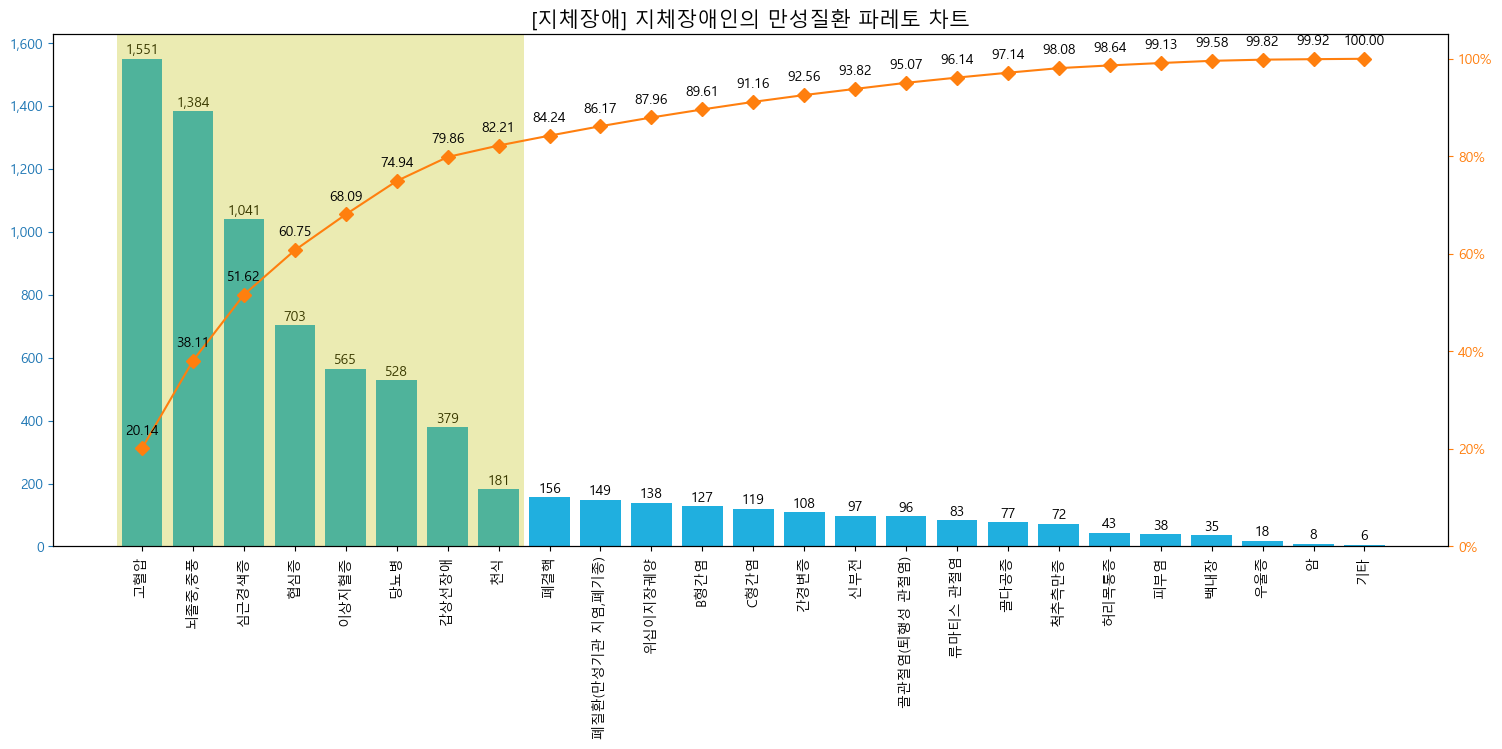

In [295]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

disease_col = phy_data['disease_name'].tolist()

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(18, 8) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=phy_data, x = 'disease_name', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[지체장애] 지체장애인의 만성질환 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(phy_data['disease_name'], phy_data["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(phy_data['disease_name'], phy_data['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 7.5, facecolor='y', alpha=0.3)
plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/지체장애/[지체장애]지체장애인의 만성질환 파레토 차트.png", dpi=300) # 저장
plt.show()